### Problem Statement:

The market for logistics analytics is expected to develop at a CAGR of 17.3 percent
from 2019 to 2024, more than doubling in size. This data demonstrates how logistics
organizations are understanding the advantages of being able to predict what will
happen in the future with a decent degree of certainty. Logistics leaders may use this
data to address supply chain difficulties, cut costs, and enhance service levels all at the
same time.

In [1268]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set()

In [1269]:
# Logging operation

logging.basicConfig(filename='Development_logs.log', level=logging.INFO,
                    format='%(levelname)s:%(asctime)s:%(message)s')

In [1270]:
# importing dataset

df = pd.read_csv(r'C:\Users\sushi\Data Science\iNeuron\Internship project\Consignment Pricing\Consignment_Pricing\Dataset\SCMS_Delivery_History_Dataset.csv')

df.head(10)

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   
5  23   112-NG-T01  Pre-PQ Process   SCMS-87   ASN-57        Nigeria   
6  44   110-ZM-T01  Pre-PQ Process  SCMS-139  ASN-130         Zambia   
7  45   109-TZ-T01  Pre-PQ Process  SCMS-140   ASN-94       Tanzania   
8  46   112-NG-T01  Pre-PQ Process  SCMS-156   ASN-93        Nigeria   
9  47   110-ZM-T01  Pre-PQ Process  SCMS-165  ASN-199         Zambia   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              EXW           Air   
2   PMO - US  Direct Drop              FCA           Air   
3   PMO - US  Direct Drop              EXW           Air   
4   PMO - US  Direct Drop              EXW           Air   
5   PMO - US  Direct Drop              EXW           Air   
6   PMO - US  Direct Drop              DDU           Air   
7   PMO - US  Direct Drop              EXW           Air   
8   PMO - US  Direct Drop              EXW           Air   
9   PMO - US  Direct Drop              CIP           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured               02-Jun-06   
1               Pre-PQ Process      Date Not Captured               14-Nov-06   
2               Pre-PQ Process      Date Not Captured               27-Aug-06   
3               Pre-PQ Process      Date Not Captured               01-Sep-06   
4               Pre-PQ Process      Date Not Captured               11-Aug-06   
5               Pre-PQ Process      Date Not Captured               28-Sep-06   
6               Pre-PQ Process      Date Not Captured               08-Jan-07   
7               Pre-PQ Process      Date Not Captured               24-Nov-06   
8               Pre-PQ Process      Date Not Captured               07-Dec-06   
9               Pre-PQ Process               11/13/06               30-Jan-07   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0                02-Jun-06              02-Jun-06          HRDT   
1                14-Nov-06              14-Nov-06           ARV   
2                27-Aug-06              27-Aug-06          HRDT   
3                01-Sep-06              01-Sep-06           ARV   
4                11-Aug-06              11-Aug-06           ARV   
5                28-Sep-06              28-Sep-06           ARV   
6                08-Jan-07              08-Jan-07           ARV   
7                24-Nov-06              24-Nov-06           ARV   
8                07-Dec-06              07-Dec-06           ARV   
9                30-Jan-07              30-Jan-07           ARV   

  Sub Classification                                             Vendor  \
0           HIV test                        RANBAXY Fine Chemicals LTD.   
1          Pediatric                           Aurobindo Pharma Limited   
2           HIV test                               Abbott GmbH & Co. KG   
3              Adult  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4              Adult                           Aurobindo Pharma Limited   
5          Pediatric                           Aurobindo Pharma Limited   
6          Pediatric  MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK ...   
7              Adult                           Aurobindo Pharma Limited   
8              Adult                           Aurobindo Pharma Limited   
9              Adult    ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)   

                                    Item Description  \
0  HIV, Reveal G3 Rapid HIV-1 Antibod

In [1271]:
# checking the dimensions of the dataframe

df.shape

(10324, 33)

In [1272]:
# Checking missing value in dataset

df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [1273]:
# Checking the statistical aspects of the dataframe

df.describe()

ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Line Item Insurance (USD)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000000e+00      0.000000      0.000000                   0.000000  
25%       4.314593e+03      4.120000      0.080000                   6.510000  
50%       3.047147e+04      9.300000      0.160000                  47.040000  
75%       1.664471e+05     23.592500      0.470000                 252.400000  
max       5.951990e+06   1345.640000    238.650000                7708.440000

In [1274]:
# Checking type and value count of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [1275]:
# Logging operation

logging.info('model checks are done')

### Data Checks and Data Cleaning

In [1276]:
# Checking categorical columns

cat_col= df.select_dtypes(include='object')
print(cat_col.columns)
print(len(cat_col.columns))

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Manufacturing Site', 'First Line Designation',
       'Weight (Kilograms)', 'Freight Cost (USD)'],
      dtype='object')
26


In [1277]:
# Checking numerical columns

num_col= df.select_dtypes(exclude='object')
print(num_col.columns)
print(len(num_col.columns))

Index(['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price',
       'Line Item Insurance (USD)'],
      dtype='object')
7


In [1278]:
# Checking for missing value

df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [1279]:
# Checking for missing value percentage

100*(df.isnull().sum()/len(df))

ID                               0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    3.487021
PQ First Sent to Client Date     0.000000
PO Sent to Vendor Date           0.000000
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          16.815188
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

### Missing Value treatment: Column `Shipment Mode`

In [1280]:
# Missing value treatment for columns- Shipment Mode 

df['Shipment Mode'].value_counts(dropna=False)

Air            6113
Truck          2830
Air Charter     650
Ocean           371
NaN             360
Name: Shipment Mode, dtype: int64

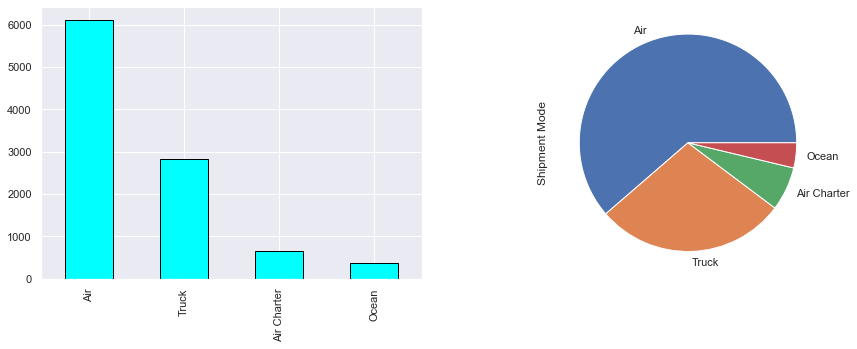

In [1281]:
# Plotting barplot for levels 

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Shipment Mode'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Shipment Mode'].value_counts().plot.pie()
plt.show()

In [1282]:
# Replacing missing value as level 'Other_Mode'

df['Shipment Mode'] = df['Shipment Mode'].fillna('Other_Mode')

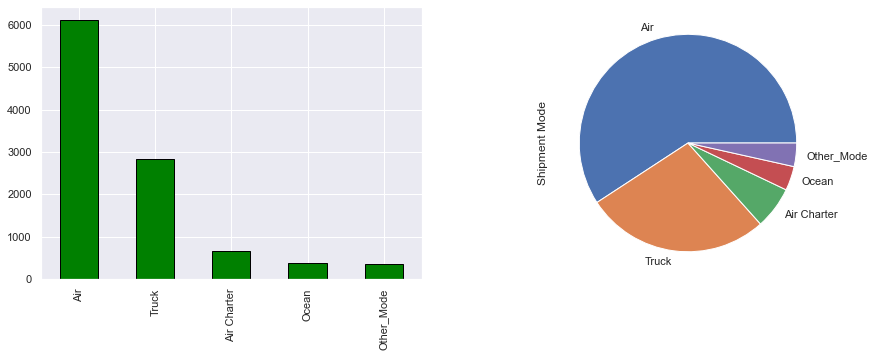

In [1283]:
# Checking column again

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Shipment Mode'].value_counts().plot.bar(color= 'Green',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Shipment Mode'].value_counts().plot.pie()
plt.show()

### Shipment Mode: Column `Dosage`

In [1284]:
# Missing value treatment for column- Dosage

df['Dosage'].value_counts(dropna=False)

NaN                1736
300mg               990
200mg               932
600mg               772
150/300mg           600
150/300/200mg       580
10mg/ml             552
150mg               431
200/50mg            395
300/300mg           301
600/300/300mg       286
150/200/30mg        250
100mg               228
50mg                174
200/300mg           160
80/20mg/ml          158
400mg               156
20mg/ml             152
30mg                144
600/200/300mg       139
150/30mg            133
30/50/60mg          127
300/200mg            94
30/60mg              89
250mg                88
100/25mg             73
60/30mg              73
600/300mg            63
300/100mg            54
1mg/ml               54
20mg                 43
25mg                 39
15mg                 38
30mg/ml              33
300/150/300mg        28
30/50/6mg            19
30/6mg               14
500/25mg             13
80mg/ml              13
60/100/12mg          12
20/120mg             12
2g              

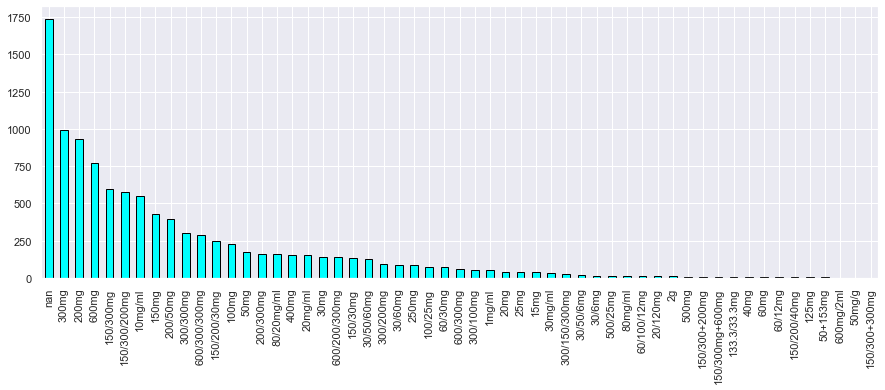

In [1285]:
# Plotting barplot for levels 
plt.figure(figsize=(15,5))
df['Dosage'].value_counts(dropna=False).plot.bar(color= 'Cyan',edgecolor='Black')
plt.show()

#### Dropping Dosage column as maximum values are missing and number of levels will only increase computing.

In [1286]:
df = df.drop('Dosage',axis = 1)

### Shipment Mode: Column `Line Item Insurance (USD)`

In [1287]:
# Checking missing values
df['Line Item Insurance (USD)'].value_counts(dropna=False)

NaN        287
0.00        54
0.02        37
0.07        33
0.05        30
0.06        30
0.01        26
0.03        23
0.09        21
0.08        20
0.49        18
0.24        18
0.13        18
0.12        18
0.15        18
0.26        18
0.14        17
0.44        17
0.34        16
0.29        15
0.38        15
0.19        15
0.17        15
342.39      15
0.10        15
0.28        15
0.25        15
0.42        15
0.04        14
0.30        14
0.18        14
0.31        13
5.12        13
0.20        13
330.00      13
0.51        12
0.54        12
0.96        12
0.35        12
0.99        11
0.23        11
1.03        11
0.82        11
0.71        11
0.52        11
0.16        11
36.96       10
0.64        10
31.36       10
0.57        10
320.00      10
0.41        10
0.67        10
1.10        10
0.22        10
0.72         9
0.60         9
0.46         9
1.16         9
0.89         9
2.96         9
1.92         9
0.37         9
0.11         9
0.86         9
440.92       8
0.33      

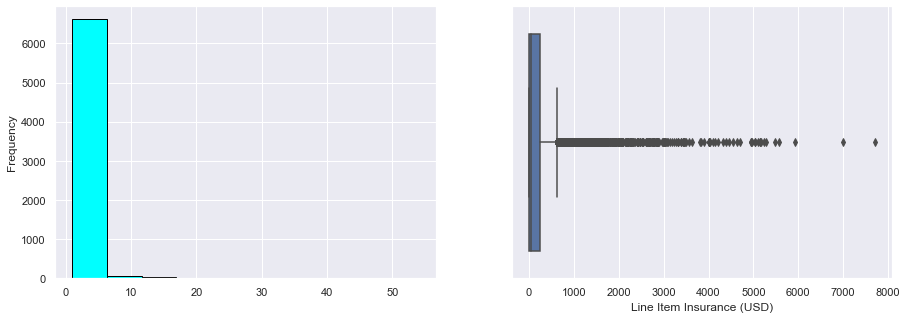

In [1288]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Line Item Insurance (USD)'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Line Item Insurance (USD)'])
plt.show()

In [1289]:
# Checking statistical aspects of column

df['Line Item Insurance (USD)'].describe()

count    10037.000000
mean       240.117626
std        500.190568
min          0.000000
25%          6.510000
50%         47.040000
75%        252.400000
max       7708.440000
Name: Line Item Insurance (USD), dtype: float64

In [1290]:
# Checking missing value present in the column

df['Line Item Insurance (USD)'].isnull().sum()

287

In [1291]:
# Replacing missing values with the median value of column

mid_insurance = df['Line Item Insurance (USD)'].median()

df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(mid_insurance)

In [1292]:
# Checking missing value present in the column again

df['Line Item Insurance (USD)'].isnull().sum()

0

In [1293]:
# Checking for missing value in dataframe again

df.isnull().sum()

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Designation          0
Weight (Kilogr

In [1294]:
# Logging operation

logging.info('Missing value treatment done.')

## Data Cleaning & Visualization:

In [1295]:
df.head()

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              EXW           Air   
2   PMO - US  Direct Drop              FCA           Air   
3   PMO - US  Direct Drop              EXW           Air   
4   PMO - US  Direct Drop              EXW           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured               02-Jun-06   
1               Pre-PQ Process      Date Not Captured               14-Nov-06   
2               Pre-PQ Process      Date Not Captured               27-Aug-06   
3               Pre-PQ Process      Date Not Captured               01-Sep-06   
4               Pre-PQ Process      Date Not Captured               11-Aug-06   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0                02-Jun-06              02-Jun-06          HRDT   
1                14-Nov-06              14-Nov-06           ARV   
2                27-Aug-06              27-Aug-06          HRDT   
3                01-Sep-06              01-Sep-06           ARV   
4                11-Aug-06              11-Aug-06           ARV   

  Sub Classification                                             Vendor  \
0           HIV test                        RANBAXY Fine Chemicals LTD.   
1          Pediatric                           Aurobindo Pharma Limited   
2           HIV test                               Abbott GmbH & Co. KG   
3              Adult  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4              Adult                           Aurobindo Pharma Limited   

                                    Item Description  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                 Lamivudine 150mg, tablets, 60 Tabs   
4                  Stavudine 30mg, capsules, 60 Caps   

                         Molecule/Test Type      Brand      Dosage Form  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal         Test kit   
1                                Nevirapine    Generic  Oral suspension   
2       HIV 1/2, Determine Complete HIV Kit  Determine         Test kit   
3                                Lamivudine    Generic           Tablet   
4                                 Stavudine    Generic          Capsule   

   Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   Pack Price  Unit Price             Manufacturing Site  \
0       29.00        0.97     Ranbaxy Fine Chemicals LTD   
1        6.20        0.03      Aurobindo Unit III, India   
2       80.00        0.80  ABBVIE GmbH & Co.KG Wiesbaden   
3        3.99        0.07  Ranbaxy, Paonta Shahib, India   
4        3.20        0.05      Aurobindo Unit III, India   

  First Line Designation Weight (Kilograms) Freight Cost (USD)  \
0                    Yes                 13             780.34   
1                    Yes                358             4521.5   
2                    Yes                171            1653.78   
3                    Yes          

In [1296]:
# Dropping Columns - ID and Project code

df = df.drop(['ID', 'Project Code'], axis= 1)

In [1297]:
df.head()

PQ # PO / SO # ASN/DN #        Country Managed By  Fulfill Via  \
0  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   PMO - US  Direct Drop   
1  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   PMO - US  Direct Drop   
2  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   PMO - US  Direct Drop   
3  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   PMO - US  Direct Drop   
4  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   PMO - US  Direct Drop   

  Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
0              EXW           Air               Pre-PQ Process   
1              EXW           Air               Pre-PQ Process   
2              FCA           Air               Pre-PQ Process   
3              EXW           Air               Pre-PQ Process   
4              EXW           Air               Pre-PQ Process   

  PO Sent to Vendor Date Scheduled Delivery Date Delivered to Client Date  \
0      Date Not Captured               02-Jun-06                02-Jun-06   
1      Date Not Captured               14-Nov-06                14-Nov-06   
2      Date Not Captured               27-Aug-06                27-Aug-06   
3      Date Not Captured               01-Sep-06                01-Sep-06   
4      Date Not Captured               11-Aug-06                11-Aug-06   

  Delivery Recorded Date Product Group Sub Classification  \
0              02-Jun-06          HRDT           HIV test   
1              14-Nov-06           ARV          Pediatric   
2              27-Aug-06          HRDT           HIV test   
3              01-Sep-06           ARV              Adult   
4              11-Aug-06           ARV              Adult   

                                              Vendor  \
0                        RANBAXY Fine Chemicals LTD.   
1                           Aurobindo Pharma Limited   
2                               Abbott GmbH & Co. KG   
3  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4                           Aurobindo Pharma Limited   

                                    Item Description  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                 Lamivudine 150mg, tablets, 60 Tabs   
4                  Stavudine 30mg, capsules, 60 Caps   

                         Molecule/Test Type      Brand      Dosage Form  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal         Test kit   
1                                Nevirapine    Generic  Oral suspension   
2       HIV 1/2, Determine Complete HIV Kit  Determine         Test kit   
3                                Lamivudine    Generic           Tablet   
4                                 Stavudine    Generic          Capsule   

   Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   Pack Price  Unit Price             Manufacturing Site  \
0       29.00        0.97     Ranbaxy Fine Chemicals LTD   
1        6.20        0.03      Aurobindo Unit III, India   
2       80.00        0.80  ABBVIE GmbH & Co.KG Wiesbaden   
3        3.99        0.07  Ranbaxy, Paonta Shahib, India   
4        3.20        0.05      Aurobindo Unit III, India   

  First Line Designation Weight (Kilograms) Freight Cost (USD)  \
0                    Yes                 13             780.34   
1                    Yes                358             4521.5   
2                    Yes                171            1653.78   
3                    Yes               1855           16007.06   
4                    Yes               7590           45450.08   

   Line Item 

### Data Cleaning & Visualization - column`PQ #`

In [1298]:
# Checking column 'PQ #' i.e. Price Quote(PQ) number

df['PQ #'].value_counts()

Pre-PQ Process    2681
FPQ-14942          205
FPQ-12522          154
FPQ-13973          110
FPQ-4537            98
FPQ-8840            90
FPQ-5303            78
FPQ-7175            78
FPQ-6262            75
FPQ-5023            70
FPQ-11828           57
FPQ-8464            48
FPQ-15569           42
FPQ-9432            42
FPQ-13035           39
FPQ-6708            39
FPQ-4384            38
FPQ-12800           35
FPQ-8952            35
FPQ-5648            34
FPQ-15038           33
FPQ-5925            33
FPQ-3560            33
FPQ-11022           33
FPQ-4378            33
FPQ-7053            33
FPQ-9749            31
FPQ-16001           30
FPQ-13123           29
FPQ-14226           28
FPQ-14989           27
FPQ-13214           27
FPQ-15692           27
FPQ-13142           27
FPQ-3815            27
FPQ-14370           27
FPQ-12587           27
FPQ-14895           26
FPQ-5688            26
FPQ-14396           26
FPQ-15294           25
FPQ-10811           24
FPQ-11033           24
FPQ-13524  

#### Considering Field Notes " Pre-PQ Process" indicates deliveries that occurred before the PQ process was put in place in mid-2009.
- Creating only two levels as "Pre-PQ Process" and "Post-PQ Process".

In [1299]:
# Creating only two levels as "Pre-PQ Process" and "Post-PQ Process".
def two_level(x):
    if x == 'Pre-PQ Process':
        return 'Pre-PQ Process'
    else:
        return 'Post-PQ Process'
    
df['PQ #'] = df['PQ #'].apply(two_level)

In [1300]:
# Checking value counts

df['PQ #'].value_counts()

Post-PQ Process    7643
Pre-PQ Process     2681
Name: PQ #, dtype: int64

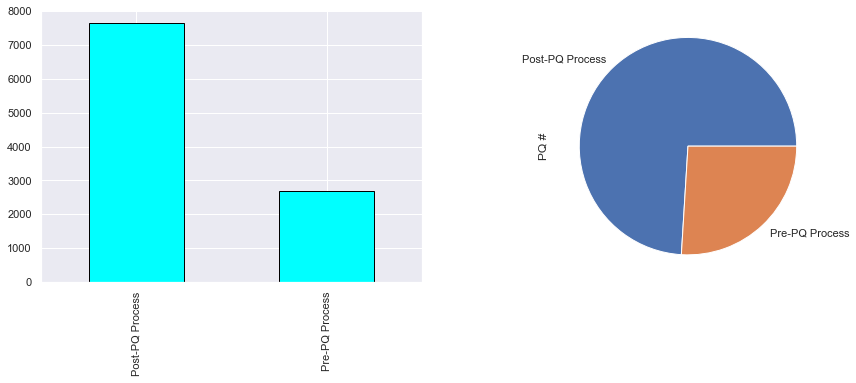

In [1301]:
# Plotting values
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['PQ #'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['PQ #'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column`PO /SO #`

In [1302]:
# Checking column 'PO /SO #' i.e. Order number: Purchase order (PO) for Direct Drop deliveries, or Sales Order (SO) 
# for from Regional Delivery Center (RDC) deliveries

df['PO / SO #'].value_counts()

SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-259075    38
SCMS-215370    38
SCMS-259079    33
SCMS-23500     26
SCMS-215410    26
SCMS-162440    20
SCMS-259078    20
SCMS-19800     18
SCMS-16600     18
SCMS-238550    17
SCMS-272160    17
SCMS-259074    17
SO-298         17
SCMS-238555    17
SCMS-71370     17
SCMS-259072    17
SCMS-14050     16
SCMS-196561    16
SCMS-295800    16
SCMS-259077    16
SCMS-267020    16
SCMS-238554    16
SCMS-41190     15
SCMS-280220    15
SCMS-60170     15
SCMS-280210    15
SCMS-259071    15
SCMS-199280    15
SCMS-259073    15
SCMS-33320     15
SCMS-238552    15
SCMS-238551    14
SCMS-272170    14
SCMS-54980     14
SCMS-238553    14
SCMS-28830     14
SCMS-253260    14
SCMS-238556    13
SCMS-41140     13
SO-44400       13
SCMS-83790     13
SCMS-259076    12
SCMS-83770     12
SO-1039        12
SO-47630       11
SO-37150       11
SCMS-68980     11
SCMS-240830    11
SCMS-204300    11
SCMS-83830     11
SCMS-239410    11
SO-914         10
SCMS-22484

#### Removing numbers from Purchase Order or Sales Order and keeping only order type level.

In [1303]:
# Removing numbers from Purchase Order or Sales Order and keeping only order type level.
def red_order(x):
    x_split = x.split("-")
    x_return = x_split[0]
    return x_return

In [1304]:
# Applying function

df['PO / SO #'] = df['PO / SO #'].apply(red_order)

In [1305]:
# Checking value counts

df['PO / SO #'].value_counts(dropna=False)

SO      5404
SCMS    4919
DSCM       1
Name: PO / SO #, dtype: int64

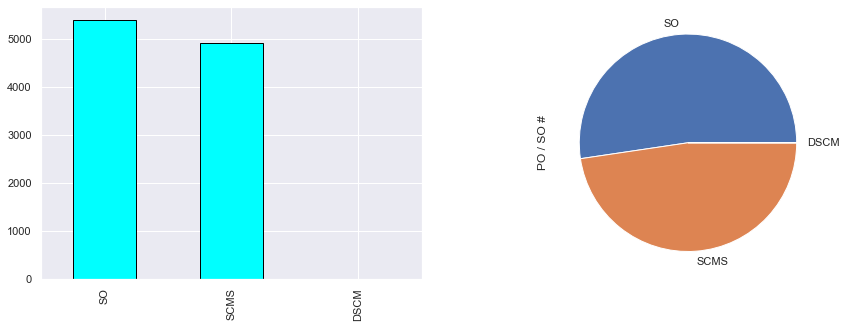

In [1306]:
# Plotting values
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['PO / SO #'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['PO / SO #'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column `ASN/DN #`

In [1307]:
# Checking column 'ASN/DN #' i.e. Shipment number: Advanced Shipment Note (ASN) for Direct Drop deliveries, 
# or Delivery Note (DN) for from RDC deliveries

df['ASN/DN #'].value_counts()

ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28036    17
DN-304       17
ASN-28033    17
ASN-30792    17
ASN-28034    17
ASN-1520     16
ASN-28037    16
ASN-29764    16
ASN-1665     16
ASN-2293     16
ASN-7373     16
ASN-27976    15
ASN-24433    15
ASN-27979    15
ASN-3732     15
ASN-31750    15
ASN-1251     15
ASN-32231    15
ASN-27980    15
ASN-27978    15
ASN-28279    14
ASN-33852    14
ASN-30377    14
ASN-30671    14
ASN-28021    14
ASN-3553     14
ASN-29257    14
ASN-31070    14
ASN-26882    14
ASN-33470    13
ASN-33851    13
ASN-3752     13
DN-3015      13
ASN-31854    13
ASN-32122    13
ASN-33865    13
ASN-33477    12
ASN-29597    12
ASN-26738    11
DN-3561      11
DN-2035      11
ASN-32524    11
DN-2812      10
ASN-28627    10
ASN-2503     10
ASN-24721    10
DN-3843      10
ASN-5933     10
ASN-3607     10
DN-332       10
DN-2981      10
ASN-5373     10
DN-373        9
DN-1311       9
DN-475        9
DN-3017       9
DN-2025       9
DN-2090       9
DN-944  

#### Removing numbers from Shipment number keeping only order type level.

In [1308]:
# Removing numbers from Shipment number keeping only order type level.

df['ASN/DN #'] = df['ASN/DN #'].apply(red_order)

In [1309]:
# Checking value counts

df['ASN/DN #'].value_counts(dropna=False)

DN     5404
ASN    4920
Name: ASN/DN #, dtype: int64

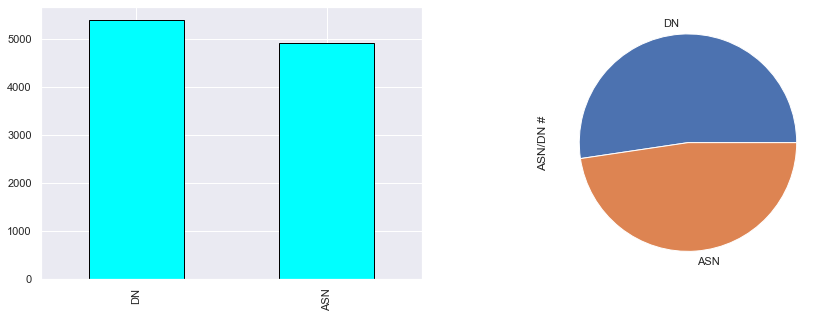

In [1310]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['ASN/DN #'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['ASN/DN #'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column`Country`

In [1311]:
# Checking value counts of each level in column 'Country'

df['Country'].value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Lesotho                  4
Sierra Leone             4
Afghanistan              3
Senegal                  3
T

In [1312]:
other_country = df['Country'].value_counts().to_dict()
other_cat = []
for k,v in other_country.items():
    if v < 30:
        other_cat.append(k)

In [1313]:
df['Country'] = df['Country'].replace(other_cat, 'other')

In [1314]:
df['Country'].value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
other                  128
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Name: Country, dtype: int64

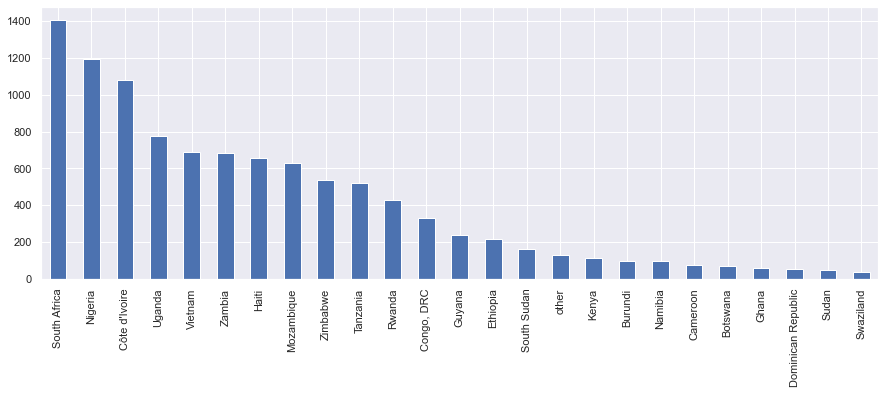

In [1315]:
# Plotting values

plt.figure(figsize=(15,5))
df['Country'].value_counts().plot(kind='bar')
plt.show()

#### Country column making clear the frequency of consignment.

### Data Cleaning & Visualization - column`Managed By`

In [1316]:
# Checking value count
df['Managed By'].value_counts()

PMO - US                     10265
South Africa Field Office       57
Ethiopia Field Office            1
Haiti Field Office               1
Name: Managed By, dtype: int64

In [1317]:
# Checking contribution of value count in percentages

100*(df['Managed By'].value_counts()/len(df))

PMO - US                     99.428516
South Africa Field Office     0.552112
Ethiopia Field Office         0.009686
Haiti Field Office            0.009686
Name: Managed By, dtype: float64

#### From above it is clear that PMO - US contributing '99+'% to the column 'Managed By'. Hence dropping column 'Managed By' as it is highly biased.

In [1318]:
df = df.drop('Managed By', axis=1)

### Data Cleaning & Visualization - column`Fulfill Via`

In [1319]:
# Checking value count
df['Fulfill Via'].value_counts()

From RDC       5404
Direct Drop    4920
Name: Fulfill Via, dtype: int64

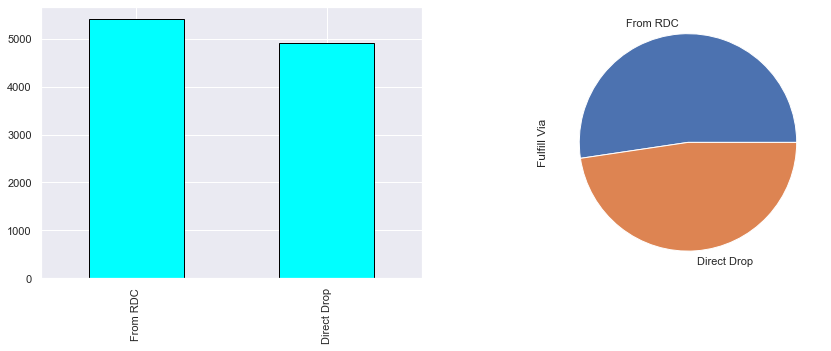

In [1320]:
# plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Fulfill Via'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Fulfill Via'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column`Vendor INCO Term`

In [1321]:
# Checking value count

df['Vendor INCO Term'].value_counts()

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: Vendor INCO Term, dtype: int64

In [1322]:
df['Vendor INCO Term'] = df['Vendor INCO Term'].replace(['DDU', 'DAP', 'CIF'], 'Other')

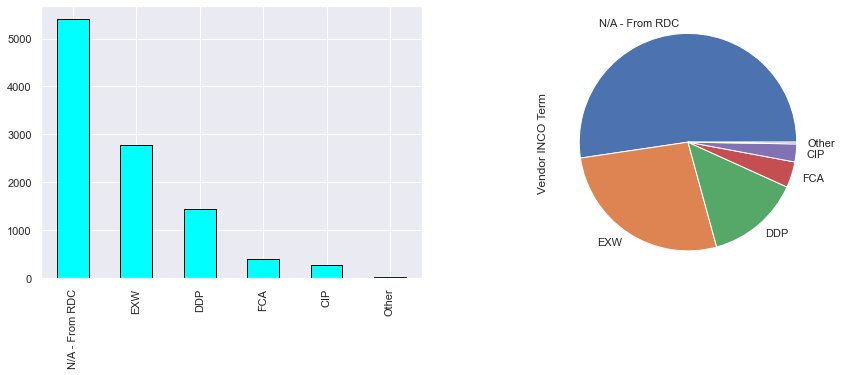

In [1323]:
# Plottimg values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Vendor INCO Term'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Vendor INCO Term'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column`PQ First Sent to Client Date`

In [1324]:
# Checking value count
df['PQ First Sent to Client Date'].value_counts()

Pre-PQ Process       2476
Date Not Captured     205
09-11-2014            205
07-11-2013            173
4/30/14               123
11-06-2009             98
11/21/11               90
03-10-2011             89
3/18/10                78
8/31/10                75
02-10-2010             72
3/18/13                64
10/13/10               62
12/13/12               56
10/21/13               53
05-07-2009             52
08-09-2013             51
12-08-2009             49
10-04-2011             48
03-01-2012             46
1/16/13                46
8/29/11                46
4/19/10                44
09-11-2012             43
4/19/13                43
6/23/10                43
12/29/14               42
10/23/09               40
10-08-2013             39
11/26/10               39
5/15/12                39
12-08-2011             38
05-06-2013             37
12/14/12               36
8/22/11                36
10/22/14               36
10/15/09               36
11/15/12               35
10-05-2012  

In [1325]:
# Cleaning data from column - PQ First Sent to Client Date

def client_date(x):
    if x == 'Pre-PQ Process':
        return pd.to_datetime('01/06/2009', format="%d/%m/%Y")
    elif x == 'Date Not Captured':
        return 'Date Not Captured'
    else:
        if len(x) < 9:
            x= pd.to_datetime(x, format="%m/%d/%y")
            return x
        else:
            x = x.replace('-', '/')
            x= pd.to_datetime(x, format="%d/%m/%Y")
            return x

In [1326]:
# Applying function

df['PQ First Sent to Client Date'] = df['PQ First Sent to Client Date'].apply(client_date)

In [1327]:
# Dropping records having value as 'Date Not Captured'

df.drop(df.index[df['PQ First Sent to Client Date'] == 'Date Not Captured'], inplace = True)

In [1328]:
# Checking value count

df['PQ First Sent to Client Date'].value_counts()

2009-06-01    2476
2014-11-09     205
2013-11-07     173
2014-04-30     123
2009-06-11      98
2011-11-21      90
2011-10-03      89
2010-03-18      78
2010-08-31      75
2010-10-02      72
2013-03-18      64
2010-10-13      62
2012-12-13      56
2013-10-21      53
2009-07-05      52
2013-09-08      51
2009-08-12      49
2011-04-10      48
2013-01-16      46
2012-01-03      46
2011-08-29      46
2010-04-19      44
2012-11-09      43
2010-06-23      43
2013-04-19      43
2014-12-29      42
2009-10-23      40
2010-11-26      39
2013-08-10      39
2012-05-15      39
2011-08-12      38
2013-06-05      37
2011-08-22      36
2009-10-15      36
2014-10-22      36
2012-12-14      36
2012-11-15      35
2012-05-10      35
2010-02-06      34
2011-04-08      33
2014-06-02      33
2015-10-03      33
2011-01-24      33
2012-04-19      31
2014-08-04      30
2014-01-04      30
2013-10-22      30
2010-07-05      30
2013-03-19      30
2009-09-09      29
2014-02-05      29
2013-06-28      28
2011-06-06  

### Data Cleaning & Visualization - column`PO Sent to Vendor Date`

In [1329]:
# Checking value count

df['PO Sent to Vendor Date'].value_counts()

N/A - From RDC       5199
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
10-09-2014             71
12-02-2013             67
9/24/10                53
2/20/15                43
05-11-2015             40
12/14/10               34
3/24/11                34
6/17/10                32
04-02-2009             32
3/28/11                32
4/30/14                31
3/27/09                29
07-10-2013             27
06-02-2014             26
7/21/09                26
10/16/12               25
2/17/15                25
1/23/12                24
06-12-2012             23
11/14/14               23
1/26/15                23
06-05-2009             23
05-08-2014             22
9/21/10                21
03-10-2014             21
4/21/10                21
8/23/13                20
8/13/13                20
2/20/08                19
9/22/09                19
3/31/08                19
2/15/11                19
12/23/09               19
08-06-2013  

In [1330]:
# Dropping column as it's most infomation is captured by from RDC.

df = df.drop('PO Sent to Vendor Date', axis= 1)

### Data Cleaning & Visualization - column `Scheduled Delivery Date`

In [1331]:
df['Scheduled Delivery Date'].value_counts()

29-Aug-14    97
16-Mar-12    83
27-Aug-14    63
31-May-10    62
31-Jan-14    60
30-Sep-14    57
16-Apr-13    56
15-Jul-10    55
19-Apr-10    53
30-Jun-15    51
24-Aug-15    51
30-Jun-14    50
30-Jan-15    42
12-May-15    42
31-Mar-11    40
06-Feb-14    39
24-Jul-15    36
25-Jun-09    36
20-Aug-08    36
30-May-14    32
30-Apr-13    31
31-Oct-13    31
31-Oct-14    31
02-Aug-12    31
30-Mar-12    30
02-Jul-15    30
28-Nov-14    30
31-Aug-10    29
30-Jun-10    29
30-Nov-10    29
31-Mar-15    28
31-Jan-11    28
13-Jan-14    27
30-Apr-15    27
30-Sep-10    26
27-Feb-15    26
21-Sep-07    26
30-Apr-14    26
30-Nov-12    25
16-Feb-15    25
31-Mar-09    25
09-Jan-13    24
29-May-15    24
07-Nov-13    24
28-Feb-14    24
16-Jun-09    24
20-Jun-12    24
31-Dec-13    24
30-Sep-13    24
31-Jul-14    23
21-Jan-08    23
29-Nov-13    23
30-Sep-11    22
31-Mar-14    22
31-May-13    22
29-Jan-08    21
31-May-11    21
10-Dec-14    21
23-Jul-15    21
18-Dec-09    20
09-Apr-13    20
13-Aug-14    20
31-Oct-1

In [1332]:
def Scheduled_date(x):
    x = x.replace('-', '/')
    x = pd.to_datetime(x, format="%d/%b/%y")
    return x

df['Scheduled Delivery Date'] = df['Scheduled Delivery Date'].apply(Scheduled_date)

In [1333]:
df['Scheduled Delivery Date'].value_counts()

2014-08-29    97
2012-03-16    83
2014-08-27    63
2010-05-31    62
2014-01-31    60
2014-09-30    57
2013-04-16    56
2010-07-15    55
2010-04-19    53
2015-08-24    51
2015-06-30    51
2014-06-30    50
2015-01-30    42
2015-05-12    42
2011-03-31    40
2014-02-06    39
2009-06-25    36
2015-07-24    36
2008-08-20    36
2014-05-30    32
2013-10-31    31
2013-04-30    31
2012-08-02    31
2014-10-31    31
2014-11-28    30
2015-07-02    30
2012-03-30    30
2010-06-30    29
2010-08-31    29
2010-11-30    29
2015-03-31    28
2011-01-31    28
2014-01-13    27
2015-04-30    27
2010-09-30    26
2015-02-27    26
2014-04-30    26
2007-09-21    26
2015-02-16    25
2012-11-30    25
2009-03-31    25
2012-06-20    24
2013-11-07    24
2015-05-29    24
2013-09-30    24
2009-06-16    24
2014-02-28    24
2013-01-09    24
2013-12-31    24
2008-01-21    23
2014-07-31    23
2013-11-29    23
2013-05-31    22
2011-09-30    22
2014-03-31    22
2008-01-29    21
2014-12-10    21
2015-07-23    21
2011-05-31    

### Data Cleaning & Visualization - column `Delivered to Client Date`

In [1334]:
df['Delivered to Client Date'].value_counts()

29-Aug-14    74
27-Aug-14    66
28-Jun-10    60
14-Feb-12    60
16-Apr-13    59
31-Mar-10    52
24-Aug-15    51
12-May-15    41
18-May-10    41
06-Feb-14    39
30-Oct-14    39
24-Jul-15    36
14-Mar-13    34
13-Jan-14    32
23-Aug-10    31
17-Aug-10    30
19-Feb-15    29
23-Jul-15    27
31-May-10    26
21-Sep-07    25
05-Nov-14    23
15-May-15    23
16-Jun-09    22
02-Dec-09    22
02-Jun-15    22
14-Apr-14    22
10-Dec-14    21
16-Feb-12    21
21-Nov-08    21
28-Apr-15    21
03-Mar-10    21
29-Jan-08    20
08-May-08    20
07-Jul-15    20
25-Jun-14    20
03-Oct-14    19
02-Jun-08    19
02-Jul-15    19
07-Feb-14    19
19-May-14    19
19-Mar-09    18
12-Mar-12    18
14-Mar-12    18
16-Feb-11    18
26-Jan-15    18
15-Mar-13    18
12-Feb-15    17
09-Mar-15    17
30-Apr-07    17
28-Sep-11    17
03-Jun-15    17
20-Jun-14    17
24-Jan-14    17
24-Jul-12    17
10-Feb-14    17
20-Oct-09    17
03-Jun-12    16
30-Apr-12    16
18-Feb-15    16
08-Dec-10    16
04-May-07    16
10-Nov-10    16
24-Apr-0

In [1335]:
df['Delivered to Client Date'] = df['Delivered to Client Date'].apply(Scheduled_date)

In [1336]:
df['Delivered to Client Date'].value_counts()

2014-08-29    74
2014-08-27    66
2010-06-28    60
2012-02-14    60
2013-04-16    59
2010-03-31    52
2015-08-24    51
2010-05-18    41
2015-05-12    41
2014-10-30    39
2014-02-06    39
2015-07-24    36
2013-03-14    34
2014-01-13    32
2010-08-23    31
2010-08-17    30
2015-02-19    29
2015-07-23    27
2010-05-31    26
2007-09-21    25
2014-11-05    23
2015-05-15    23
2009-12-02    22
2009-06-16    22
2015-06-02    22
2014-04-14    22
2015-04-28    21
2008-11-21    21
2014-12-10    21
2010-03-03    21
2012-02-16    21
2015-07-07    20
2008-05-08    20
2008-01-29    20
2014-06-25    20
2015-07-02    19
2008-06-02    19
2014-05-19    19
2014-02-07    19
2014-10-03    19
2011-02-16    18
2012-03-14    18
2013-03-15    18
2015-01-26    18
2012-03-12    18
2009-03-19    18
2014-02-10    17
2007-04-30    17
2015-06-03    17
2015-03-09    17
2012-07-24    17
2014-06-20    17
2014-01-24    17
2009-10-20    17
2015-02-12    17
2011-09-28    17
2008-12-01    16
2008-09-19    16
2011-05-20    

In [1337]:
# Dropping column Delivered to Client Date as column Delivery Recorded date is considered valid.

df = df.drop('Delivered to Client Date', axis = 1)

### Data Cleaning & Visualization - column`Delivery Recorded Date`

In [1338]:
df['Delivery Recorded Date'].value_counts()

29-Aug-14    67
27-Aug-14    66
14-Feb-12    60
28-Jun-10    60
16-Apr-13    59
31-Mar-10    52
24-Aug-15    50
18-May-10    41
12-May-15    40
07-Nov-14    39
06-Feb-14    38
24-Jul-15    36
14-Mar-13    34
25-Jun-14    31
11-Jun-14    31
23-Aug-10    31
17-Aug-10    30
13-Jan-14    29
28-Apr-14    28
04-Mar-14    27
31-May-10    26
28-Aug-14    25
05-Sep-14    25
21-Sep-07    25
09-Mar-15    24
13-Nov-14    23
19-Feb-15    23
02-Dec-09    22
10-Dec-14    22
16-Jun-09    22
16-Feb-12    21
03-Oct-14    21
03-Mar-10    21
15-May-15    21
21-Nov-08    21
30-Mar-15    21
26-Jan-15    20
29-Jul-15    20
29-Jan-08    20
08-May-08    20
07-Jul-15    19
30-Jul-15    19
02-Jun-08    19
03-Sep-15    19
28-Apr-15    19
20-Dec-13    18
06-Jun-14    18
05-Nov-14    18
16-Feb-11    18
12-Mar-12    18
15-Mar-13    18
19-Mar-09    18
14-Mar-12    18
30-Apr-07    17
28-Sep-11    17
05-Jun-15    17
20-Oct-09    17
12-Jun-14    17
18-Oct-13    17
06-Oct-14    17
07-Feb-14    17
24-Jul-12    17
04-Jan-0

In [1339]:
df['Delivery Recorded Date'] = df['Delivery Recorded Date'].apply(Scheduled_date)

In [1340]:
df['Delivery Recorded Date'].value_counts()

2014-08-29    67
2014-08-27    66
2012-02-14    60
2010-06-28    60
2013-04-16    59
2010-03-31    52
2015-08-24    50
2010-05-18    41
2015-05-12    40
2014-11-07    39
2014-02-06    38
2015-07-24    36
2013-03-14    34
2014-06-11    31
2014-06-25    31
2010-08-23    31
2010-08-17    30
2014-01-13    29
2014-04-28    28
2014-03-04    27
2010-05-31    26
2014-09-05    25
2007-09-21    25
2014-08-28    25
2015-03-09    24
2015-02-19    23
2014-11-13    23
2014-12-10    22
2009-06-16    22
2009-12-02    22
2015-03-30    21
2008-11-21    21
2014-10-03    21
2015-05-15    21
2012-02-16    21
2010-03-03    21
2015-01-26    20
2008-01-29    20
2015-07-29    20
2008-05-08    20
2015-07-30    19
2015-09-03    19
2008-06-02    19
2015-04-28    19
2015-07-07    19
2012-03-14    18
2013-03-15    18
2013-12-20    18
2011-02-16    18
2014-11-05    18
2012-03-12    18
2014-06-06    18
2009-03-19    18
2013-10-18    17
2007-04-30    17
2012-07-24    17
2011-09-28    17
2015-06-05    17
2014-10-06    

### Data Cleaning & Visualization - column `Product Group`

In [1341]:
df['Product Group'].value_counts()

ARV     8345
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64

In [1342]:
100*(df['Product Group'].value_counts()/len(df))

ARV     82.468623
HRDT    17.076786
ANTM     0.217413
ACT      0.158118
MRDT     0.079059
Name: Product Group, dtype: float64

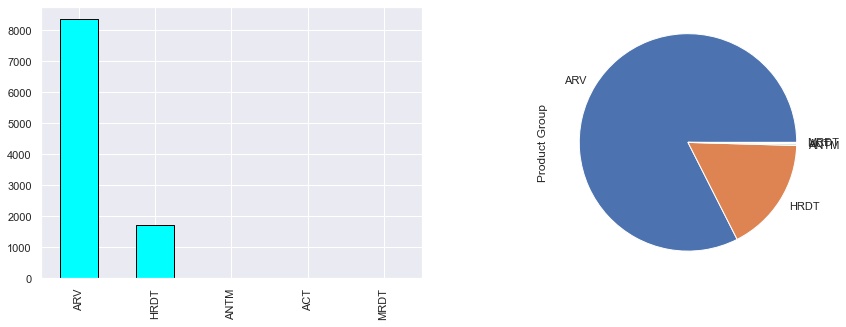

In [1343]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Product Group'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Product Group'].value_counts().plot.pie()
plt.show()

In [1344]:
# Dropping Product group column as its level ARV describe 82%+ infomation

df = df.drop('Product Group', axis=1)

### Data Cleaning & Visualization - column `Sub Classification`

In [1345]:
df['Sub Classification'].value_counts()

Adult                   6418
Pediatric               1927
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: Sub Classification, dtype: int64

In [1346]:
100*(df['Sub Classification'].value_counts()/len(df))

Adult                   63.425240
Pediatric               19.043384
HIV test                15.485720
HIV test - Ancillary     1.591066
Malaria                  0.296472
ACT                      0.158118
Name: Sub Classification, dtype: float64

In [1347]:
df['Sub Classification'] = df['Sub Classification'].replace('HIV test - Ancillary', 'HIV test')

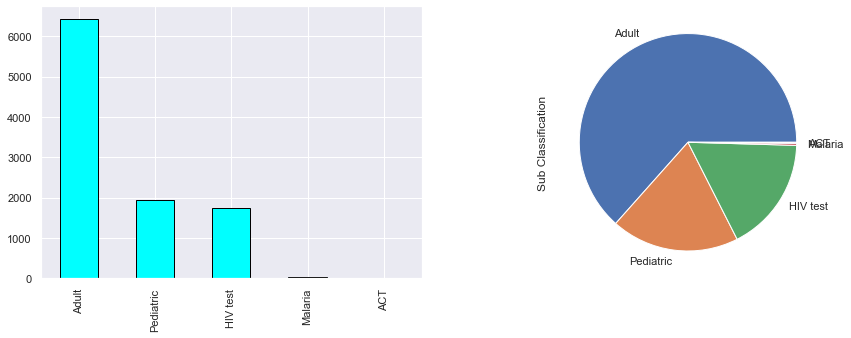

In [1348]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Sub Classification'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Sub Classification'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column `Vendor`

In [1349]:
df['Vendor'].value_counts()

SCMS from RDC                                                        5199
Orgenics, Ltd                                                         754
S. BUYS WHOLESALER                                                    715
Aurobindo Pharma Limited                                              668
Trinity Biotech, Plc                                                  356
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)                       347
PHARMACY DIRECT                                                       326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)                 317
HETERO LABS LIMITED                                                   277
CIPLA LIMITED                                                         175
CHEMBIO DIAGNOSTIC SYSTEMS, INC.                                      109
Standard Diagnostics, Inc.                                             98
STRIDES ARCOLAB LIMITED                                                93
SHANGHAI KEHUA BIOENGINEERING CO.,LTD.

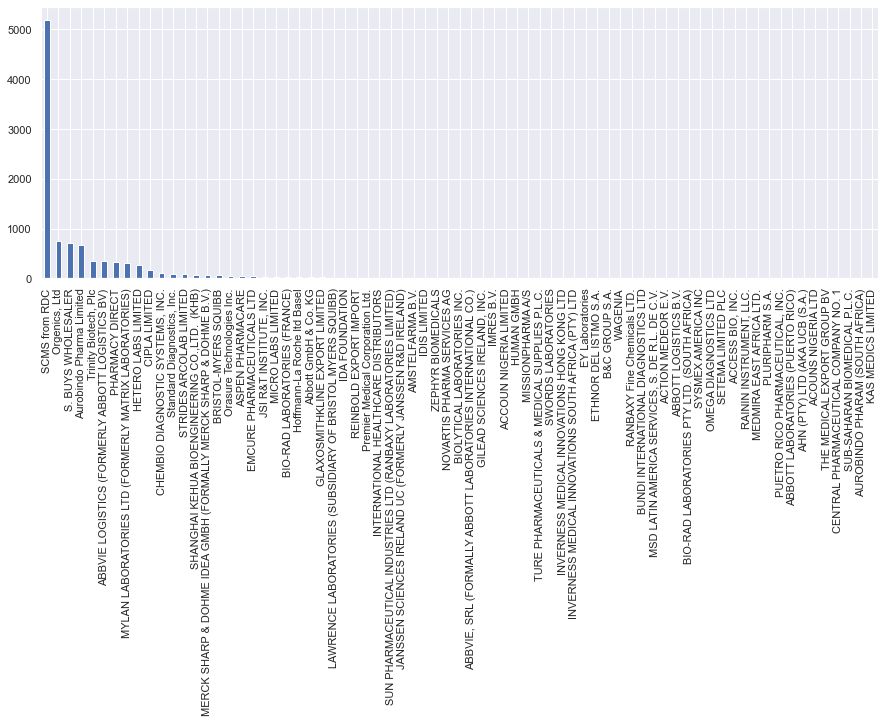

In [1350]:
plt.figure(figsize=(15,5))
df['Vendor'].value_counts().plot(kind='bar')
plt.show()

#### Here most of the information is explained by level 'SCMS from RDC' for column 'Vendor'. Hence dropping column Vendor.

In [1351]:
df = df.drop('Vendor', axis=1)

### Data Cleaning & Visualization - column `Item Description`

In [1352]:
df['Item Description'].value_counts()

Efavirenz 600mg, tablets, 30 Tabs                                                                                    733
Nevirapine 200mg, tablets, 60 Tabs                                                                                   605
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                                                    580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                                                                       577
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                                                     554
HIV 1/2, Uni-Gold HIV Kit, 20 Tests                                                                                  369
Lamivudine 150mg, tablets, 60 Tabs                                                                                   367
Zidovudine 300mg, tablets, 60 Tabs                                                                                   310
Lamivudine/Tenofovir Disoproxil 

#### Here, column Item Description gives infomation on drugs, hence dropping it.

In [1353]:
df = df.drop('Item Description', axis= 1)

### Data Cleaning & Visualization - column `Molecule/Test Type`

In [1354]:
df['Molecule/Test Type'].value_counts()

Efavirenz                                                                                             1099
Nevirapine                                                                                             854
Lamivudine/Nevirapine/Zidovudine                                                                       681
Lamivudine/Zidovudine                                                                                  672
Lopinavir/Ritonavir                                                                                    629
HIV 1/2, Determine Complete HIV Kit                                                                    577
Lamivudine                                                                                             577
Zidovudine                                                                                             516
Abacavir                                                                                               441
HIV 1/2, Uni-Gold HIV Kit            

#### Here, column Molecule/Test Type gives information on test type and consituting molecules present in it. Hence dropping it.

In [1355]:
df = df.drop('Molecule/Test Type',axis=1)

### Data Cleaning & Visualization - column `Brand`

In [1356]:
df['Brand'].value_counts()

Generic            7098
Determine           799
Uni-Gold            373
Aluvia              250
Kaletra             161
Norvir              136
Stat-Pak            115
Bioline             113
Videx                84
Truvada              83
Colloidal Gold       70
Stocrin/Sustiva      69
OraQuick             60
Viread               51
Invirase             51
Zerit                46
Isentress            44
Prezista             42
Epivir               42
Retrovir             41
Videx EC             41
Ziagen               37
Crixivan             36
Capillus             35
Intelence            32
Genie                30
Viramune             28
Clearview            19
Reyataz              18
Trizivir             18
Atripla              16
First Response       15
Coartem              12
Viracept             11
Multispot             5
DoubleCheck           5
INSTi                 5
Paramax               5
LAV                   4
ImmunoComb            3
Reveal                3
Combivir        

In [1357]:
100*(df['Brand'].value_counts(normalize=True))

Generic            70.145271
Determine           7.896037
Uni-Gold            3.686135
Aluvia              2.470600
Kaletra             1.591066
Norvir              1.344006
Stat-Pak            1.136476
Bioline             1.116711
Videx               0.830122
Truvada             0.820239
Colloidal Gold      0.691768
Stocrin/Sustiva     0.681886
OraQuick            0.592944
Viread              0.504002
Invirase            0.504002
Zerit               0.454590
Isentress           0.434826
Prezista            0.415061
Epivir              0.415061
Retrovir            0.405178
Videx EC            0.405178
Ziagen              0.365649
Crixivan            0.355766
Capillus            0.345884
Intelence           0.316237
Genie               0.296472
Viramune            0.276707
Clearview           0.187766
Reyataz             0.177883
Trizivir            0.177883
Atripla             0.158118
First Response      0.148236
Coartem             0.118589
Viracept            0.108706
Multispot     

#### Dropping Brand column as 70% of infomation is described by level Generic

In [1358]:
df = df.drop('Brand', axis= 1)

### Data Cleaning & Visualization - column `Dosage Form`

In [1359]:
df['Dosage Form'].value_counts()

Tablet                                3462
Tablet - FDC                          2659
Test kit                              1575
Oral solution                          712
Capsule                                706
Chewable/dispersible tablet - FDC      239
Oral suspension                        209
Test kit - Ancillary                   161
Chewable/dispersible tablet            144
Delayed-release capsules               131
Delayed-release capsules - blister      41
Powder for oral solution                28
Tablet - FDC + co-blister               20
Tablet - FDC + blister                  15
Tablet - blister                        10
Injection                                6
Oral powder                              1
Name: Dosage Form, dtype: int64

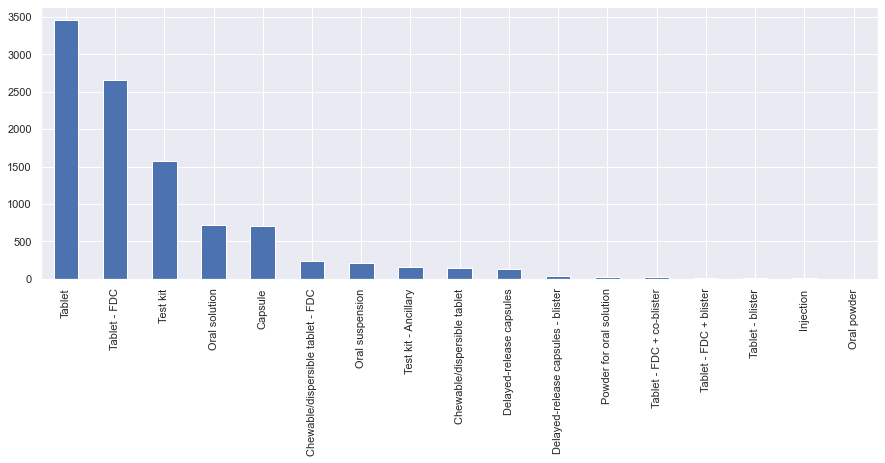

In [1360]:
plt.figure(figsize=(15,5))
df['Dosage Form'].value_counts().plot(kind='bar')
plt.show()

#### Dropping column Dosage Form as its is dependent on Dosage.

In [1361]:
df = df.drop('Dosage Form', axis= 1)

### Data Cleaning & Visualization - column `Unit of Measure (Per Pack)`

In [1362]:
df['Unit of Measure (Per Pack)'].value_counts()

60      3993
30      2580
100      974
240      655
120      474
20       470
90       219
300      153
1        126
25       114
180       76
200       75
270       51
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
5          4
18         4
2          4
36         3
168        3
12         2
24         2
160        1
144        1
48         1
Name: Unit of Measure (Per Pack), dtype: int64

### Data Cleaning & Visualization - column `Line Item Quantity`

In [1363]:
df['Line Item Quantity'].value_counts()

10000     93
1000      91
100       85
2000      73
5000      69
500       67
20000     66
3000      66
3         62
50000     62
300       60
4000      58
200       55
400       55
20        54
10        54
30        54
50        49
100000    49
1500      49
6         48
4         46
2         40
6000      39
120       39
1200      38
1         35
150       35
60        34
40        33
8000      32
2500      32
600       32
80        31
15        31
12        29
800       28
25        28
240       27
15000     27
5         27
90        27
7         27
350       26
8         26
25000     25
450       25
45        24
30000     24
2744      23
250       22
60000     22
9         22
7000      21
40000     21
70        20
11        20
1600      19
18        19
168       19
24        19
140       19
36        19
3500      18
19        18
45000     18
1800      18
4500      18
12000     18
23        18
27        17
2100      17
17        17
9000      17
4200      16
35000     16
1400      16

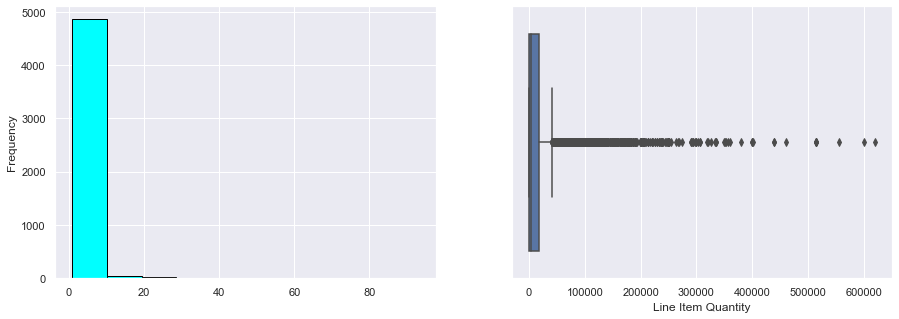

In [1364]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Line Item Quantity'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Line Item Quantity'])
plt.show()

### Data Cleaning & Visualization - column `Line Item Value`

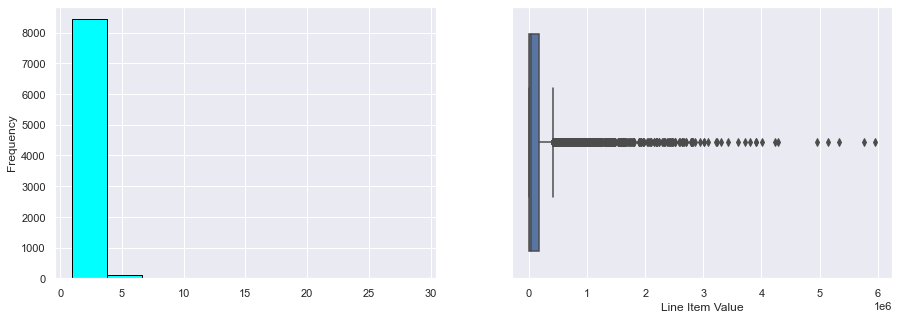

In [1365]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Line Item Value'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Line Item Value'])
plt.show()

In [1366]:
round(df['Line Item Value'].describe(),3)

count      10119.000
mean      157236.232
std       344675.474
min            0.000
25%         4283.825
50%        30400.000
75%       165451.220
max      5951990.400
Name: Line Item Value, dtype: float64

### Data Cleaning & Visualization - column `Pack Price`

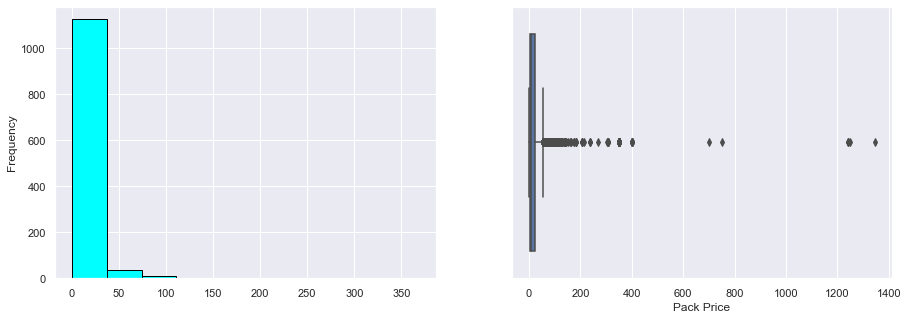

In [1367]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Pack Price'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Pack Price'])
plt.show()

In [1368]:
round(df['Pack Price'].describe(),3)

count    10119.000
mean        22.181
std         46.013
min          0.000
25%          4.150
50%          9.350
75%         24.000
max       1345.640
Name: Pack Price, dtype: float64

### Data Cleaning & Visualization - column `Unit Price`

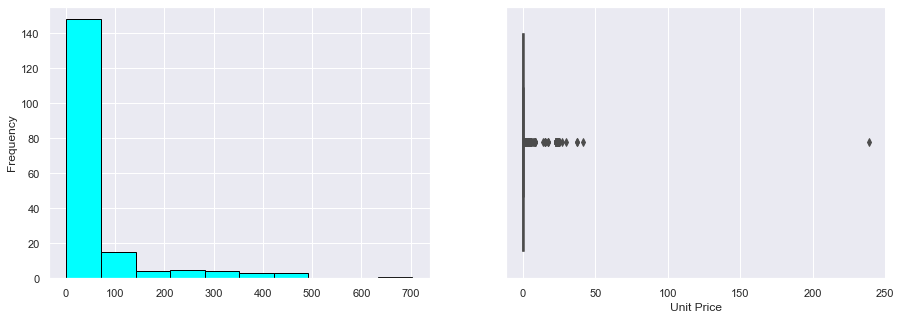

In [1369]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Unit Price'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Unit Price'])
plt.show()

In [1370]:
round(df['Unit Price'].describe(),3)

count    10119.000
mean         0.620
std          3.308
min          0.000
25%          0.080
50%          0.160
75%          0.485
max        238.650
Name: Unit Price, dtype: float64

### Data Cleaning & Visualization - column `Manufacturing Site`

In [1371]:
df['Manufacturing Site'].value_counts()

Aurobindo Unit III, India                                                   3056
Mylan (formerly Matrix) Nashik                                              1383
Hetero Unit III Hyderabad IN                                                 858
Cipla, Goa, India                                                            652
Strides, Bangalore, India.                                                   530
Alere Medical Co., Ltd.                                                      481
Trinity Biotech, Plc                                                         405
ABBVIE Ludwigshafen Germany                                                  366
Inverness Japan                                                              345
ABBVIE (Abbott) Logis. UK                                                    215
BMS Meymac, France                                                           148
Aspen-OSD, Port Elizabeth, SA                                                129
Chembio Diagnostics Sys. Inc

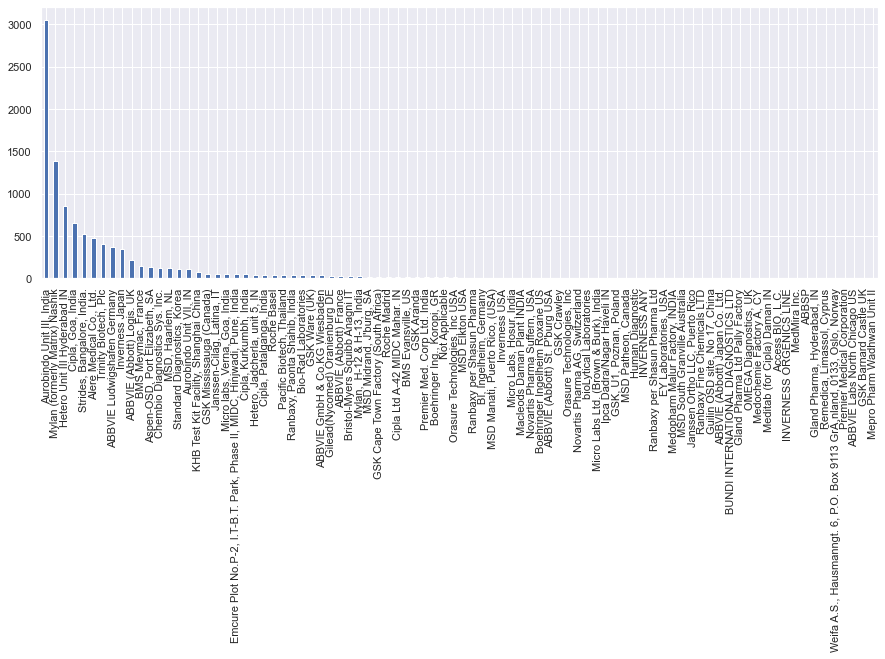

In [1372]:
plt.figure(figsize=(15,5))
df['Manufacturing Site'].value_counts().plot(kind='bar')
plt.show()

In [1373]:
other_manuf = df['Manufacturing Site'].value_counts().to_dict()
other_cat = []
for k,v in other_manuf.items():
    if v < 50:
        other_cat.append(k)

In [1374]:
df['Manufacturing Site'] = df['Manufacturing Site'].replace(other_cat, 'other')

In [1375]:
df['Manufacturing Site'].value_counts()

Aurobindo Unit III, India                                                   3056
Mylan (formerly Matrix) Nashik                                              1383
Hetero Unit III Hyderabad IN                                                 858
other                                                                        798
Cipla, Goa, India                                                            652
Strides, Bangalore, India.                                                   530
Alere Medical Co., Ltd.                                                      481
Trinity Biotech, Plc                                                         405
ABBVIE Ludwigshafen Germany                                                  366
Inverness Japan                                                              345
ABBVIE (Abbott) Logis. UK                                                    215
BMS Meymac, France                                                           148
Aspen-OSD, Port Elizabeth, S

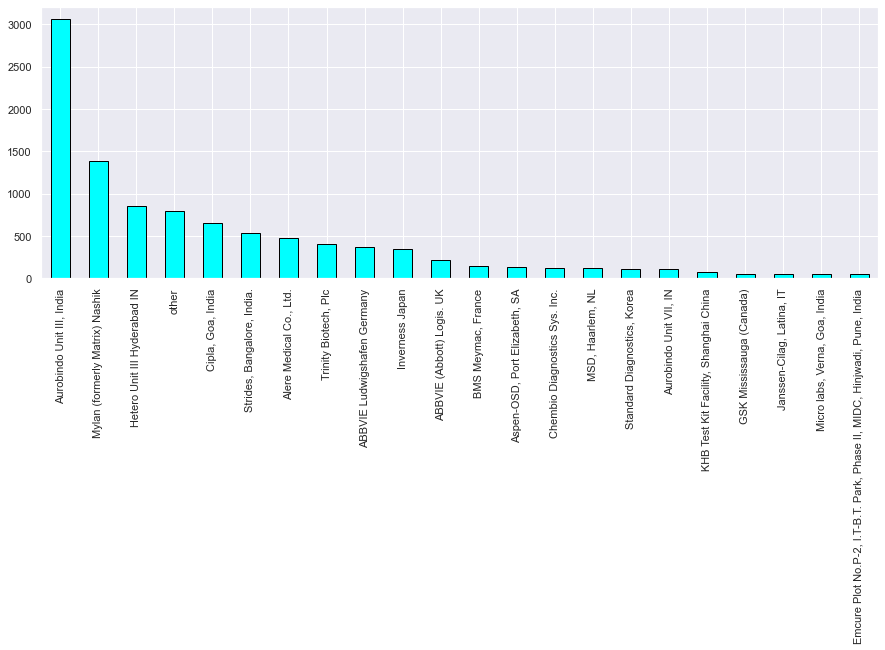

In [1376]:
plt.figure(figsize= (15,5))
df['Manufacturing Site'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')
plt.show()

### Data Cleaning & Visualization - column `First Line Designation`

In [1377]:
df['First Line Designation'].value_counts()

Yes    6876
No     3243
Name: First Line Designation, dtype: int64

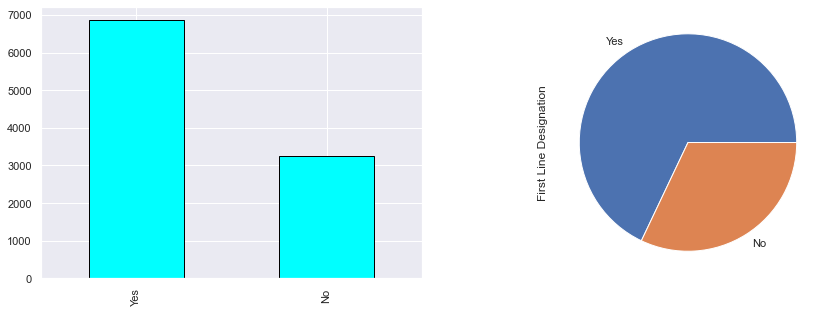

In [1378]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['First Line Designation'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['First Line Designation'].value_counts().plot.pie()
plt.show()

### Data Cleaning & Visualization - column `Weight (Kilograms)`

In [1379]:
df['Weight (Kilograms)'].value_counts()

Weight Captured Separately    1499
2                               29
6                               26
1                               21
60                              20
5                               20
4                               18
3                               18
9                               17
14                              17
12                              17
17                              17
21                              16
39                              16
See DN-304 (ID#:10589)          16
7                               16
25                              16
36                              16
76                              15
15                              15
30                              15
16                              15
24                              15
13                              15
46                              15
58                              15
40                              15
10                              14
18                  

In [1380]:
# Dropping column Weight (Kilograms) as it contain missing values in terms of nomianal values

df = df.drop('Weight (Kilograms)', axis= 1)

### Data Cleaning & Visualization - column`Freight Cost (USD)`

In [1381]:
df['Freight Cost (USD)'].value_counts()

Freight Included in Commodity Cost    1440
Invoiced Separately                    231
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
13398.06                                16
See ASN-32231 (ID#:13648)               14
See ASN-31750 (ID#:19272)               14
See ASN-28279 (ID#:13547)               13
7329.83                                 12
See DN-3015 (ID#:82554)                 12
25231.96                                11
1211.48                                 11
See DN-2035 (ID#:82356)                 10
16532.5                                 10
15459.09                                10
17090                                   10
15128.37                                10
12601.07                                10
18495.9                                 10
See DN-3561 (ID#:82654)                 10
14547.55                                10
15322.73                                10
See ASN-267

In [1382]:
def other_cate(x):
    if x.find('See') != -1:
        return np.nan
    elif x == 'Freight Included in Commodity Cost' or x == 'Invoiced Separately':
        return 0
    else:
        return x

In [1383]:
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].apply(other_cate)

In [1384]:
df['Freight Cost (USD)'].value_counts(dropna=False)

NaN          2394
0            1671
9736.1         36
6147.18        27
13398.06       16
7329.83        12
25231.96       11
1211.48        11
15128.37       10
15459.09       10
12601.07       10
16532.5        10
15322.73       10
18495.9        10
17090          10
14547.55       10
11637.64        9
290             8
1698.83         8
18461.22        7
27441.22        7
5121.68         7
20761           7
11492.86        6
4263.07         6
3279.25         6
28812.57        6
20225.07        6
21326.73        6
26340           6
20264.93        6
24927.19        6
3646.13         6
21084.84        5
26266.34        5
7317.47         5
20666.07        5
51090           5
6443.61         5
1791.42         5
5530.11         5
6036.96         5
2938.92         5
29780.5         5
9405.81         5
30936.1         5
3296.34         5
3833.17         4
3402.23         4
226.25          4
21347.12        4
44347.71        4
37242.5         4
522.42          4
49199.75        4
6105.79   

In [1385]:
# Changing dtype to float

df['Freight Cost (USD)'] = df['Freight Cost (USD)'].astype('float')

In [1386]:
df['Freight Cost (USD)'].describe()

count      7725.000000
mean       8778.633996
std       14839.980798
min           0.000000
25%         578.010000
50%        3526.690000
75%       11311.600000
max      289653.200000
Name: Freight Cost (USD), dtype: float64

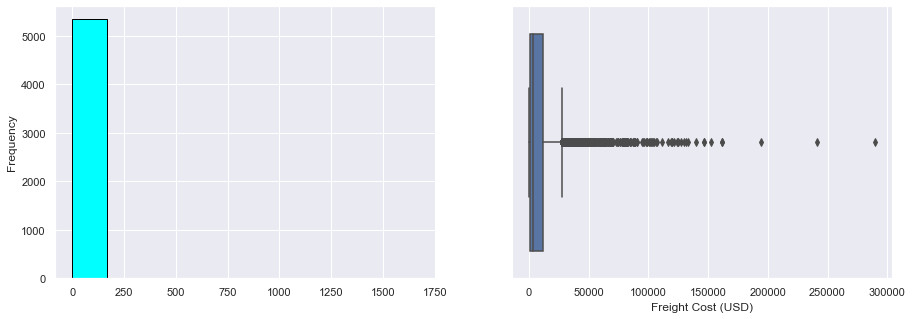

In [1387]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Freight Cost (USD)'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Freight Cost (USD)'])
plt.show()

In [1388]:
# Replacing np.nan values with column median values

median_val = df['Freight Cost (USD)'].median()

df['Freight Cost (USD)'] = df['Freight Cost (USD)'].replace(np.nan,median_val)

In [1389]:
df['Freight Cost (USD)'].value_counts(dropna=False)

3526.69      2397
0.00         1671
9736.10        36
6147.18        27
13398.06       16
7329.83        12
25231.96       11
1211.48        11
15459.09       10
15128.37       10
12601.07       10
16532.50       10
14547.55       10
15322.73       10
17090.00       10
18495.90       10
11637.64        9
1698.83         8
290.00          8
5121.68         7
20761.00        7
27441.22        7
18461.22        7
3646.13         6
4263.07         6
20225.07        6
20264.93        6
21326.73        6
24927.19        6
28812.57        6
26340.00        6
11492.86        6
3279.25         6
2938.92         5
9405.81         5
3296.34         5
51090.00        5
30936.10        5
6443.61         5
5530.11         5
26266.34        5
7317.47         5
1791.42         5
29780.50        5
21084.84        5
6036.96         5
20666.07        5
8815.65         4
5886.90         4
7134.39         4
1211.49         4
21347.12        4
21347.13        4
522.42          4
226.25          4
29674.92  

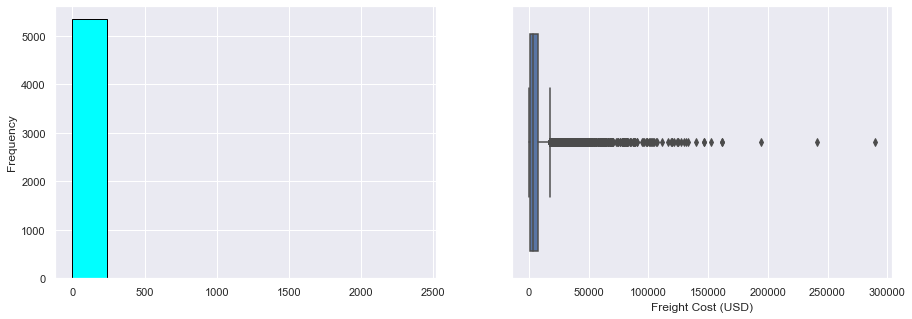

In [1390]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Freight Cost (USD)'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
sns.boxplot(df['Freight Cost (USD)'])
plt.show()

In [1391]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
0  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
1  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
2  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
3  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
4  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   

  Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
0              EXW           Air          2009-06-01 00:00:00   
1              EXW           Air          2009-06-01 00:00:00   
2              FCA           Air          2009-06-01 00:00:00   
3              EXW           Air          2009-06-01 00:00:00   
4              EXW           Air          2009-06-01 00:00:00   

  Scheduled Delivery Date Delivery Recorded Date Sub Classification  \
0              2006-06-02             2006-06-02           HIV test   
1              2006-11-14             2006-11-14          Pediatric   
2              2006-08-27             2006-08-27           HIV test   
3              2006-09-01             2006-09-01              Adult   
4              2006-08-11             2006-08-11              Adult   

   Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   Pack Price  Unit Price         Manufacturing Site First Line Designation  \
0       29.00        0.97                      other                    Yes   
1        6.20        0.03  Aurobindo Unit III, India                    Yes   
2       80.00        0.80                      other                    Yes   
3        3.99        0.07                      other                    Yes   
4        3.20        0.05  Aurobindo Unit III, India                    Yes   

   Freight Cost (USD)  Line Item Insurance (USD)  
0              780.34                      47.04  
1             4521.50                      47.04  
2             1653.78                      47.04  
3            16007.06                      47.04  
4            45450.08                      47.04

### Data Cleaning & Visualization - column`Line Item Insurance (USD)`

In [1392]:
df['Line Item Insurance (USD)'].value_counts()

47.04      289
0.00        44
0.02        34
0.07        32
0.06        30
0.05        30
0.01        23
0.03        23
0.09        21
0.08        20
0.49        18
0.26        18
0.24        18
0.15        18
0.12        17
0.14        17
0.44        17
0.13        17
0.34        16
342.39      15
0.29        15
0.17        15
0.42        15
0.38        15
0.25        15
0.10        15
0.28        15
0.19        15
0.18        14
0.30        14
0.04        14
5.12        13
0.20        13
0.31        13
330.00      13
0.51        12
0.35        12
0.54        12
0.96        12
0.23        11
0.71        11
1.03        11
0.82        11
0.99        11
0.64        10
0.16        10
0.22        10
0.41        10
36.96       10
0.57        10
320.00      10
0.67        10
0.52        10
0.89         9
0.11         9
1.16         9
1.92         9
0.86         9
1.10         9
31.36        9
0.72         9
2.96         9
0.46         9
0.60         9
0.37         8
0.63         8
1.14      

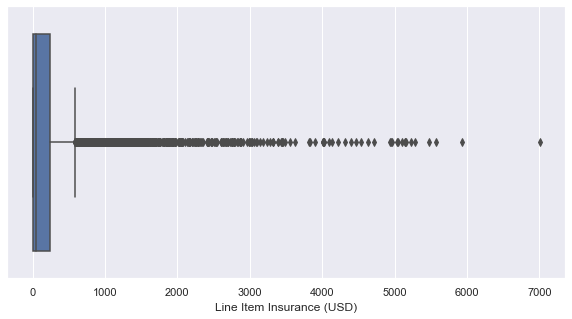

In [1393]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Line Item Insurance (USD)'])
plt.show()

### Calculating Cost

In [1394]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
0  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
1  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
2  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
3  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
4  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   

  Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
0              EXW           Air          2009-06-01 00:00:00   
1              EXW           Air          2009-06-01 00:00:00   
2              FCA           Air          2009-06-01 00:00:00   
3              EXW           Air          2009-06-01 00:00:00   
4              EXW           Air          2009-06-01 00:00:00   

  Scheduled Delivery Date Delivery Recorded Date Sub Classification  \
0              2006-06-02             2006-06-02           HIV test   
1              2006-11-14             2006-11-14          Pediatric   
2              2006-08-27             2006-08-27           HIV test   
3              2006-09-01             2006-09-01              Adult   
4              2006-08-11             2006-08-11              Adult   

   Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   Pack Price  Unit Price         Manufacturing Site First Line Designation  \
0       29.00        0.97                      other                    Yes   
1        6.20        0.03  Aurobindo Unit III, India                    Yes   
2       80.00        0.80                      other                    Yes   
3        3.99        0.07                      other                    Yes   
4        3.20        0.05  Aurobindo Unit III, India                    Yes   

   Freight Cost (USD)  Line Item Insurance (USD)  
0              780.34                      47.04  
1             4521.50                      47.04  
2             1653.78                      47.04  
3            16007.06                      47.04  
4            45450.08                      47.04

In [1395]:
df['Total_Cost'] = df['Line Item Value'] + df['Freight Cost (USD)'] + df['Line Item Insurance (USD)']

In [1396]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
0  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
1  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
2  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
3  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
4  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   

  Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
0              EXW           Air          2009-06-01 00:00:00   
1              EXW           Air          2009-06-01 00:00:00   
2              FCA           Air          2009-06-01 00:00:00   
3              EXW           Air          2009-06-01 00:00:00   
4              EXW           Air          2009-06-01 00:00:00   

  Scheduled Delivery Date Delivery Recorded Date Sub Classification  \
0              2006-06-02             2006-06-02           HIV test   
1              2006-11-14             2006-11-14          Pediatric   
2              2006-08-27             2006-08-27           HIV test   
3              2006-09-01             2006-09-01              Adult   
4              2006-08-11             2006-08-11              Adult   

   Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   Pack Price  Unit Price         Manufacturing Site First Line Designation  \
0       29.00        0.97                      other                    Yes   
1        6.20        0.03  Aurobindo Unit III, India                    Yes   
2       80.00        0.80                      other                    Yes   
3        3.99        0.07                      other                    Yes   
4        3.20        0.05  Aurobindo Unit III, India                    Yes   

   Freight Cost (USD)  Line Item Insurance (USD)  Total_Cost  
0              780.34                      47.04     1378.38  
1             4521.50                      47.04    10768.54  
2             1653.78                      47.04    41700.82  
3            16007.06                      47.04   143414.90  
4            45450.08                      47.04   167097.12

#### From column `Pack Price` we can say that is mesaured by dividing columns `Line Item Value` & `Line Item Quantity`. 

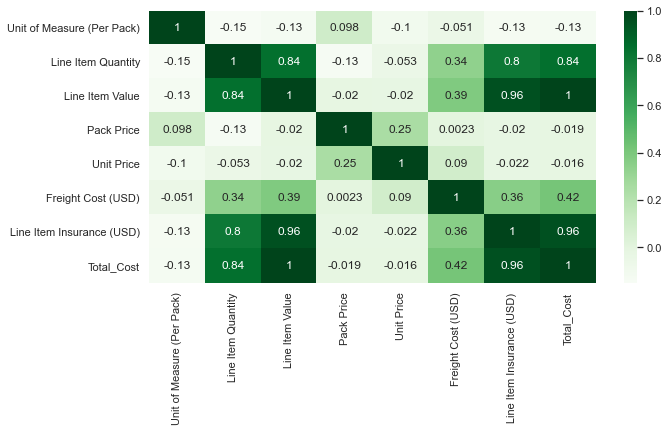

In [1397]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap = 'Greens', annot = True)
plt.show()

### Inferences:
- `Total_Cost` is strongly correlated to column `Line Item Value`, `Line Item Quantity`, `Line Item Insurance (USD)`.
- We have `Line Item Value` and `Line Item Quantity` with positive linear correlation of 0.84.
- Correlation of `Line Item Insurance (USD)` and `Line Item Value` is 0.96.
- Correlation of `Line Item Insurance (USD)` and `Line Item Quantity` is 0.80.

In [1398]:
# Hence, dropping columns- Line Item Value, Line Item Quantity, Freight Cost (USD), Line Item Insurance (USD)

df = df.drop(['Line Item Value', 'Line Item Quantity', 'Freight Cost (USD)','Line Item Insurance (USD)'], axis = 1)

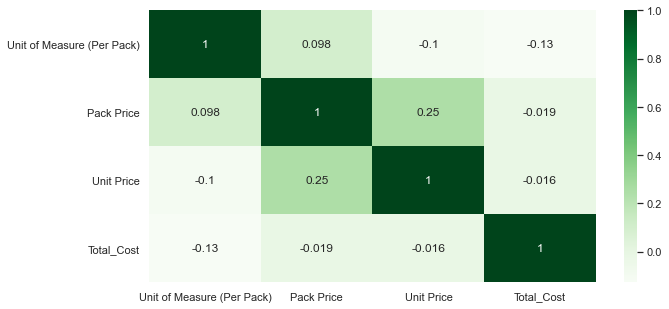

In [1399]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap = 'Greens', annot = True)
plt.show()

### Calculating days to Process 
- from PQ First Sent to Client Date to Delivery Recorded Date

In [1400]:
df['days to Process'] = df['Delivery Recorded Date'] - df['PQ First Sent to Client Date']

In [1401]:
df['days to Process'].value_counts()

293 days      120
295 days       96
156 days       85
85 days        81
180 days       63
29 days        62
42 days        59
92 days        55
120 days       54
-96 days       54
114 days       54
288 days       52
84 days        51
60 days        50
167 days       49
133 days       49
224 days       48
146 days       47
97 days        46
70 days        45
184 days       45
189 days       45
12 days        44
188 days       44
257 days       43
158 days       43
57 days        43
203 days       42
78 days        42
83 days        42
153 days       42
131 days       41
98 days        41
82 days        41
341 days       40
176 days       40
219 days       40
124 days       39
111 days       39
119 days       38
122 days       38
147 days       37
169 days       36
56 days        36
175 days       36
173 days       35
68 days        34
134 days       34
195 days       34
64 days        33
112 days       33
93 days        33
190 days       33
212 days       33
139 days       32
152 days  

In [1402]:
def to_int(x):
    x = np.timedelta64(x, 'ns')
    days = x.astype('timedelta64[D]')
    x = days / np.timedelta64(1, 'D')
    return x

df['days to Process'] = df['days to Process'].apply(to_int)

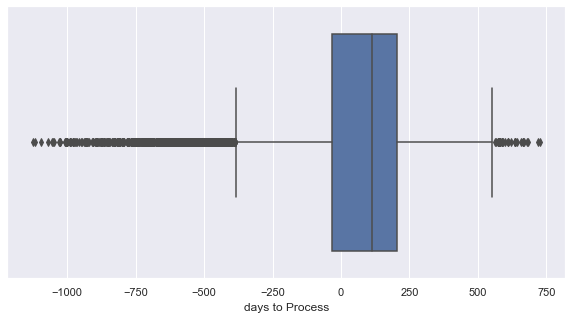

In [1403]:
plt.figure(figsize=(10,5))
sns.boxplot(df['days to Process'])
plt.show()

In [1404]:
# Dropping columns-'Delivery Recorded Date', 'Scheduled Delivery Date' and 'PQ First Sent to Client Date'

df = df.drop(['Delivery Recorded Date','PQ First Sent to Client Date', 'Scheduled Delivery Date'], axis= 1)

## Data Visualization

In [1405]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
0  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
1  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
2  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
3  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
4  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   

  Vendor INCO Term Shipment Mode Sub Classification  \
0              EXW           Air           HIV test   
1              EXW           Air          Pediatric   
2              FCA           Air           HIV test   
3              EXW           Air              Adult   
4              EXW           Air              Adult   

   Unit of Measure (Per Pack)  Pack Price  Unit Price  \
0                          30       29.00        0.97   
1                         240        6.20        0.03   
2                         100       80.00        0.80   
3                          60        3.99        0.07   
4                          60        3.20        0.05   

          Manufacturing Site First Line Designation  Total_Cost  \
0                      other                    Yes     1378.38   
1  Aurobindo Unit III, India                    Yes    10768.54   
2                      other                    Yes    41700.82   
3                      other                    Yes   143414.90   
4  Aurobindo Unit III, India                    Yes   167097.12   

   days to Process  
0          -1095.0  
1           -930.0  
2          -1009.0  
3          -1004.0  
4          -1025.0

In [1406]:
# Checking categorical columns

cat_col= df.select_dtypes(include='object')
print(cat_col.columns)
print(len(cat_col.columns))

Index(['PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Fulfill Via',
       'Vendor INCO Term', 'Shipment Mode', 'Sub Classification',
       'Manufacturing Site', 'First Line Designation'],
      dtype='object')
10


In [1407]:
# Checking numerical columns

num_col= df.select_dtypes(exclude='object')
print(num_col.columns)
print(len(num_col.columns))

Index(['Unit of Measure (Per Pack)', 'Pack Price', 'Unit Price', 'Total_Cost',
       'days to Process'],
      dtype='object')
5


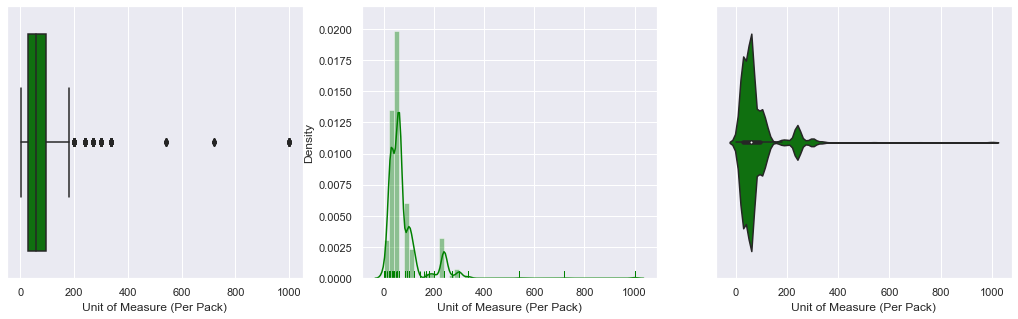

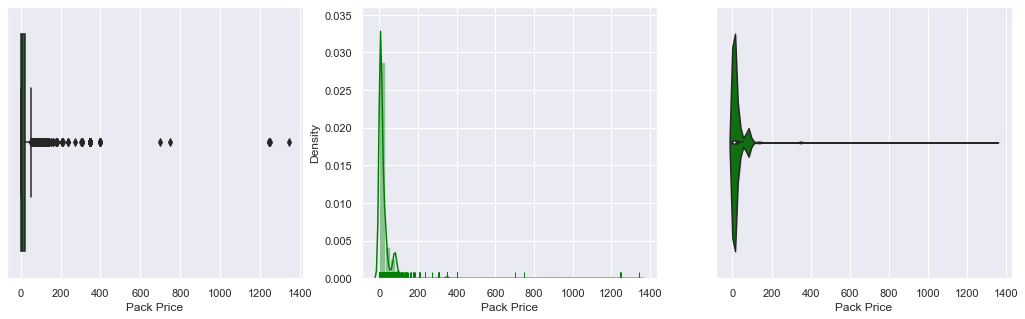

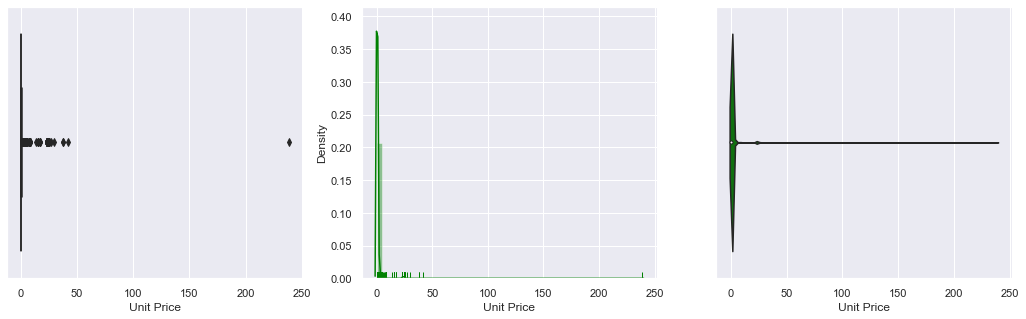

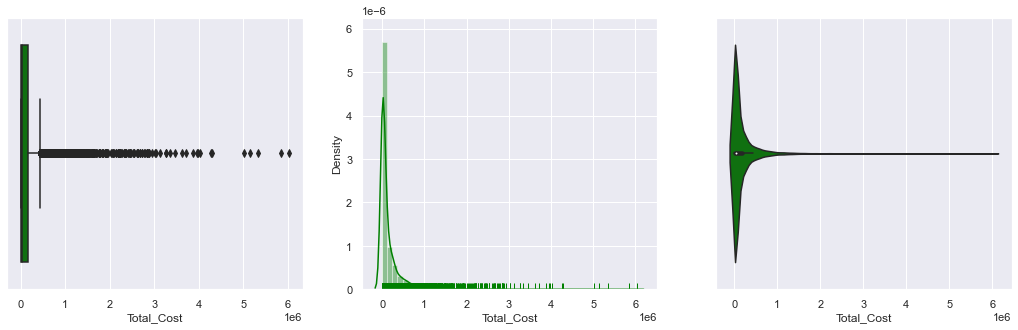

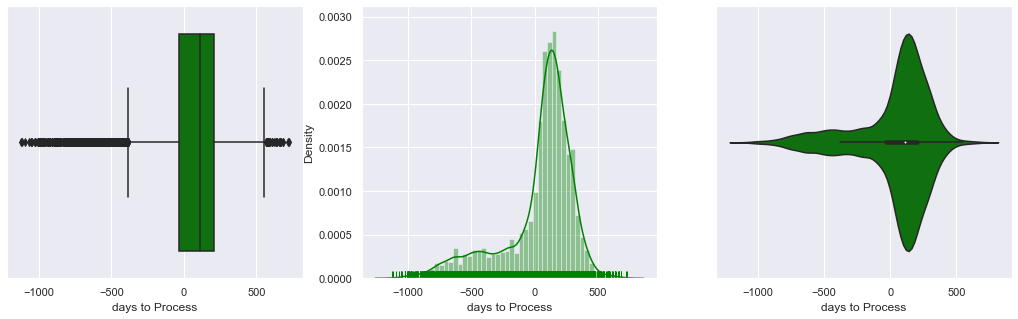

In [1408]:
# Plotting numerical columns individually

f_num = num_col.columns[:]

for i in enumerate(f_num):
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(131)
    sns.boxplot(num_col[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(num_col[i[1]], rug = True,  color= 'Green')
    
    ax2 = f.add_subplot(133)
    sns.violinplot(num_col[i[1]], orient= 'vertical',  color= 'Green')
    
    plt.show()

<Figure size 1080x720 with 0 Axes>

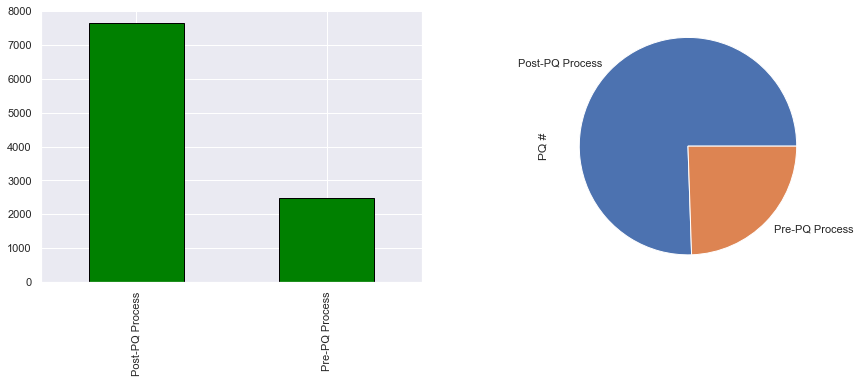

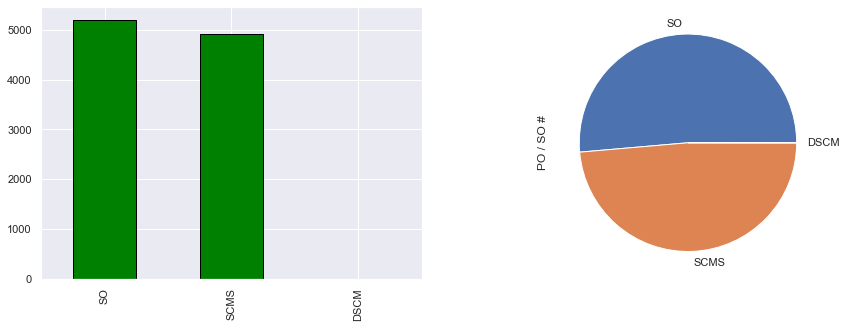

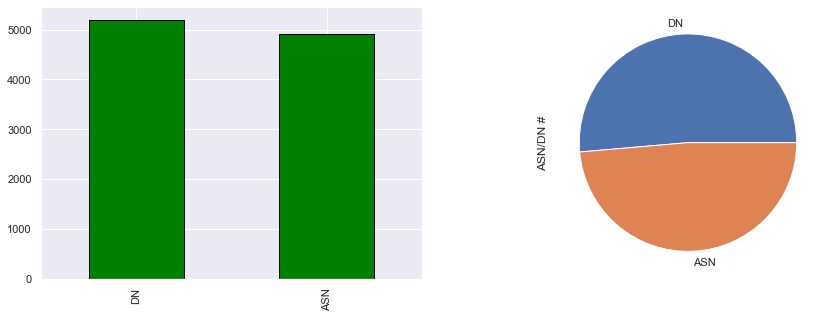

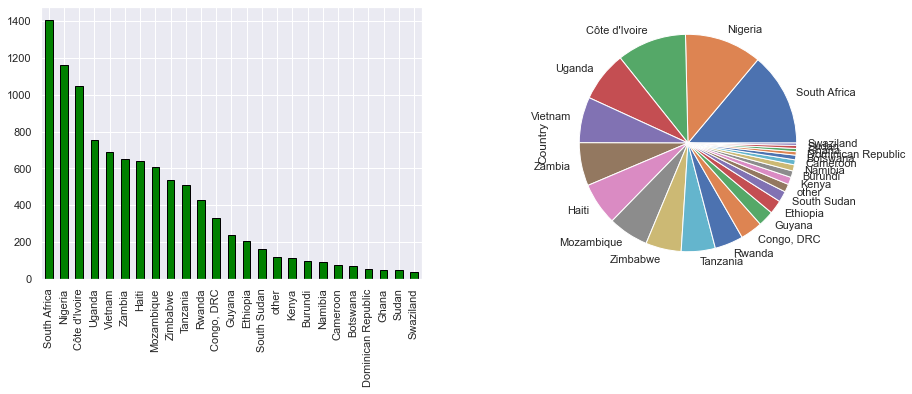

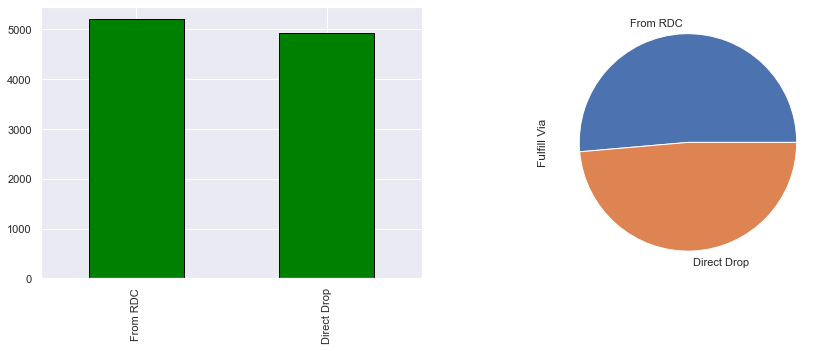

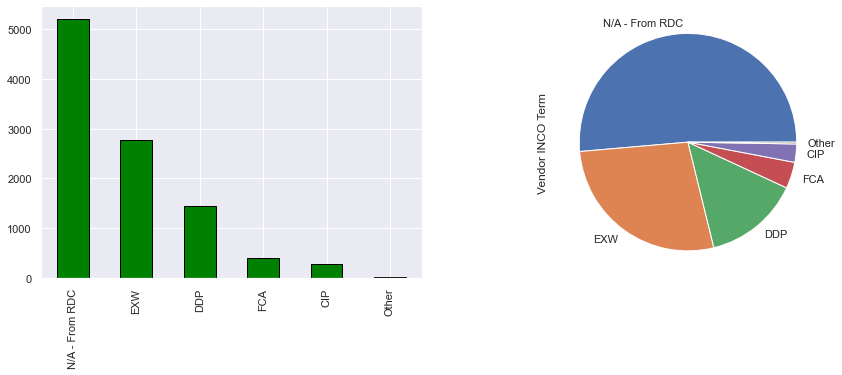

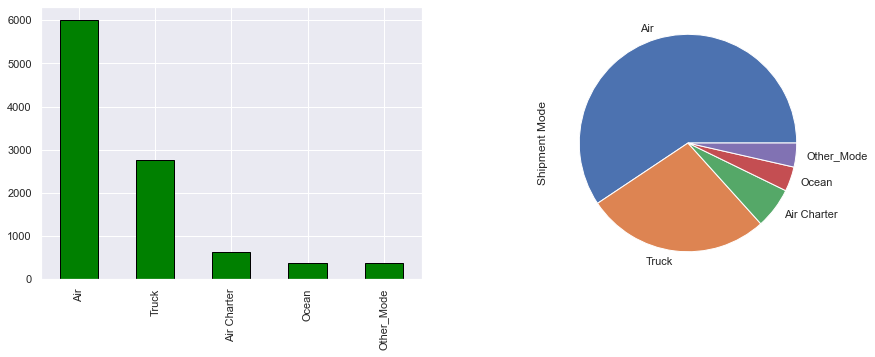

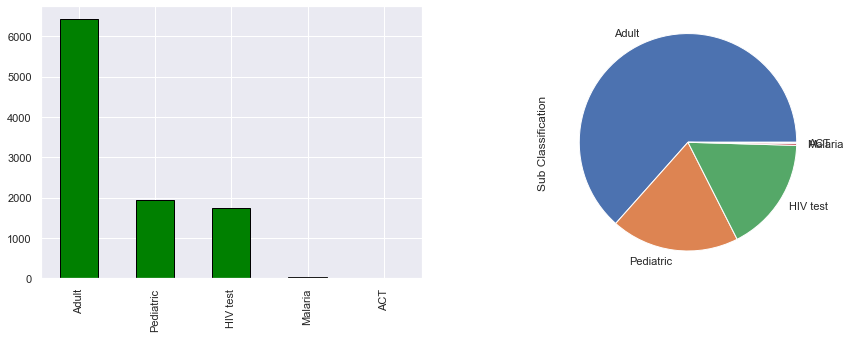

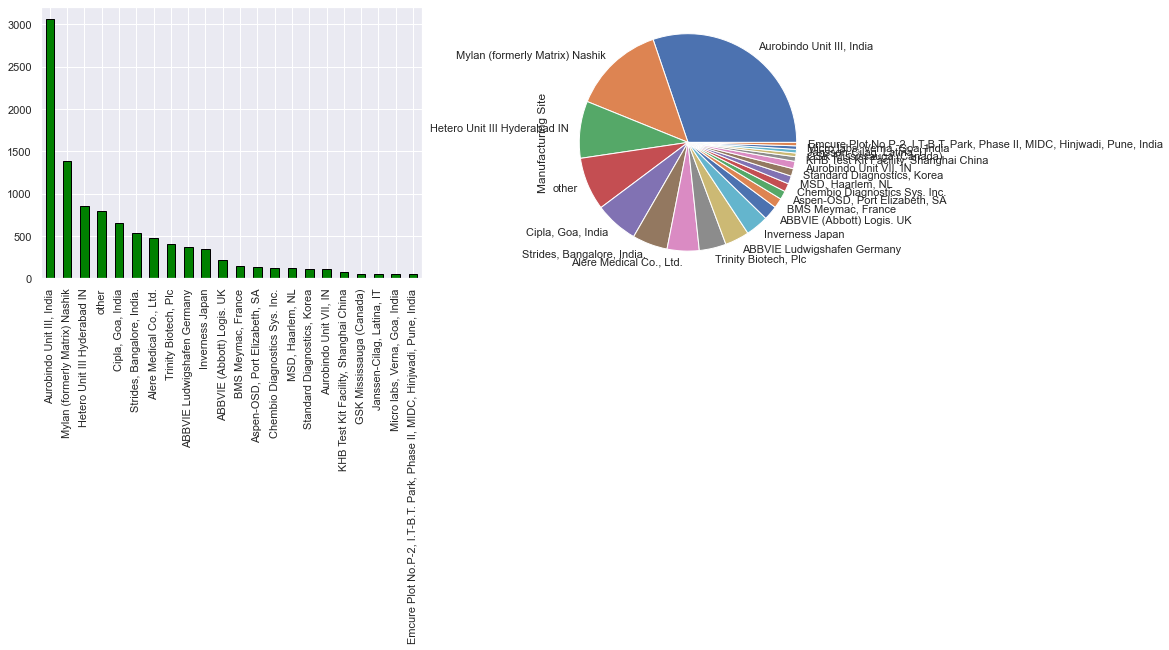

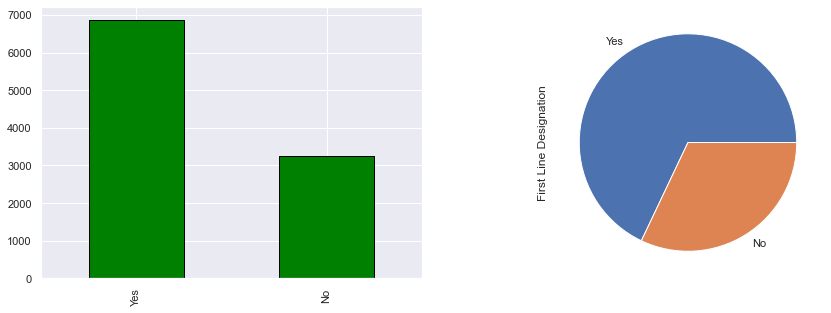

In [1409]:
# Plotting categorical columns

plt.figure(figsize = (15,10))

f_cat = cat_col.columns[:]

for i in enumerate(f_cat):
    
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    cat_col[i[1]].value_counts().plot.bar(color= 'Green',edgecolor='Black')

    ax1 = f.add_subplot(122)
    cat_col[i[1]].value_counts().plot.pie()
    
    
    plt.show()

### Outlier Detection

In [1410]:
# Checking quntile values 

for i in num_col.columns:
    print(i)
    print(num_col[i].quantile([0.1,0.9,0.95,0.99]))
    print(num_col[i].describe())
    print('\n')

Unit of Measure (Per Pack)
0.10     30.0
0.90    180.0
0.95    240.0
0.99    300.0
Name: Unit of Measure (Per Pack), dtype: float64
count    10119.000000
mean        78.069770
std         76.814735
min          1.000000
25%         30.000000
50%         60.000000
75%         95.000000
max       1000.000000
Name: Unit of Measure (Per Pack), dtype: float64


Pack Price
0.10      2.24
0.90     70.00
0.95     80.00
0.99    139.00
Name: Pack Price, dtype: float64
count    10119.000000
mean        22.181418
std         46.012764
min          0.000000
25%          4.150000
50%          9.350000
75%         24.000000
max       1345.640000
Name: Pack Price, dtype: float64


Unit Price
0.10    0.0400
0.90    0.8900
0.95    1.6000
0.99    5.0246
Name: Unit Price, dtype: float64
count    10119.000000
mean         0.620278
std          3.308133
min          0.000000
25%          0.080000
50%          0.160000
75%          0.485000
max        238.650000
Name: Unit Price, dtype: float64


Total_Cost


In [1411]:
# Removing values beyond 98% 

quartile_1 = df['Unit of Measure (Per Pack)'].quantile(0.98)
df = df[df["Unit of Measure (Per Pack)"] < quartile_1]

quartile_2 = df['Pack Price'].quantile(0.98)
df = df[df["Pack Price"] < quartile_2]

quartile_3 = df['Unit Price'].quantile(0.98)
df = df[df["Unit Price"] < quartile_3]


quartile_4 = df['Total_Cost'].quantile(0.98)
df = df[df["Total_Cost"] < quartile_4]

quartile_5 = df['days to Process'].quantile(0.2)
df = df[df["Total_Cost"] > quartile_5]

quartile_6 = df['days to Process'].quantile(0.98)
df = df[df["Total_Cost"] > quartile_6]

In [1412]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
0  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
1  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
2  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
3  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
4  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   

  Vendor INCO Term Shipment Mode Sub Classification  \
0              EXW           Air           HIV test   
1              EXW           Air          Pediatric   
2              FCA           Air           HIV test   
3              EXW           Air              Adult   
4              EXW           Air              Adult   

   Unit of Measure (Per Pack)  Pack Price  Unit Price  \
0                          30       29.00        0.97   
1                         240        6.20        0.03   
2                         100       80.00        0.80   
3                          60        3.99        0.07   
4                          60        3.20        0.05   

          Manufacturing Site First Line Designation  Total_Cost  \
0                      other                    Yes     1378.38   
1  Aurobindo Unit III, India                    Yes    10768.54   
2                      other                    Yes    41700.82   
3                      other                    Yes   143414.90   
4  Aurobindo Unit III, India                    Yes   167097.12   

   days to Process  
0          -1095.0  
1           -930.0  
2          -1009.0  
3          -1004.0  
4          -1025.0

## Data Visualization (Bi-Variate)

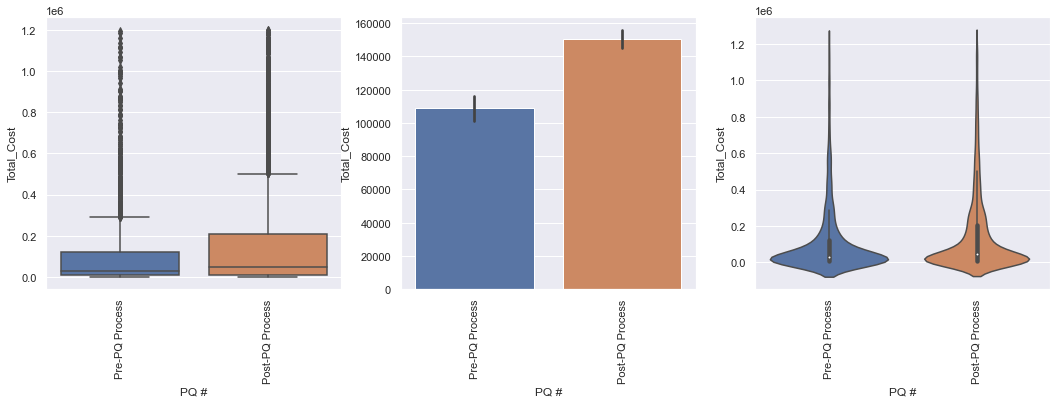

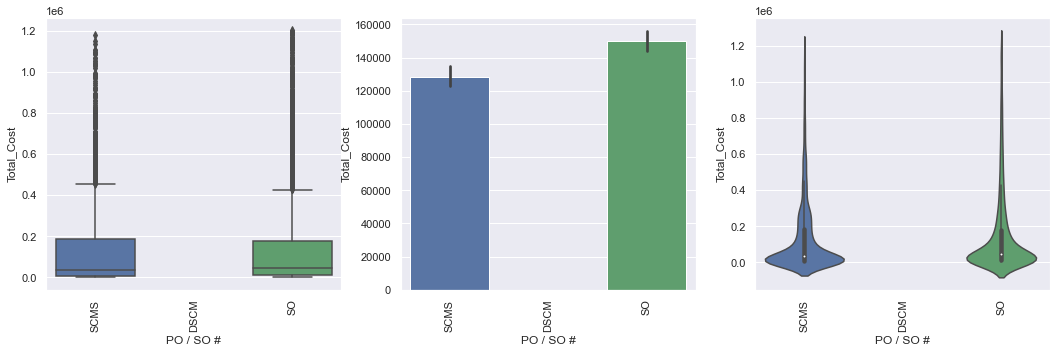

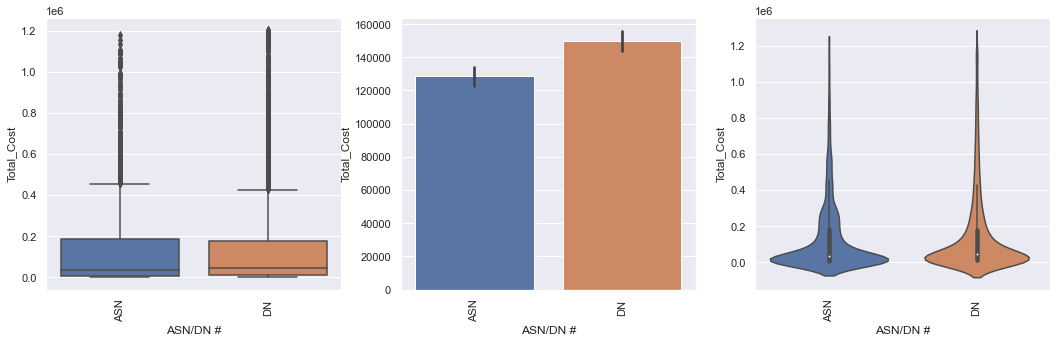

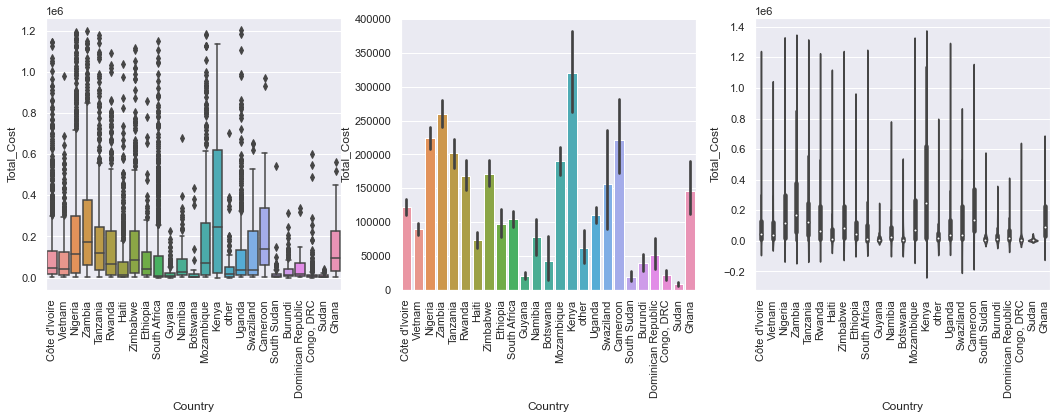

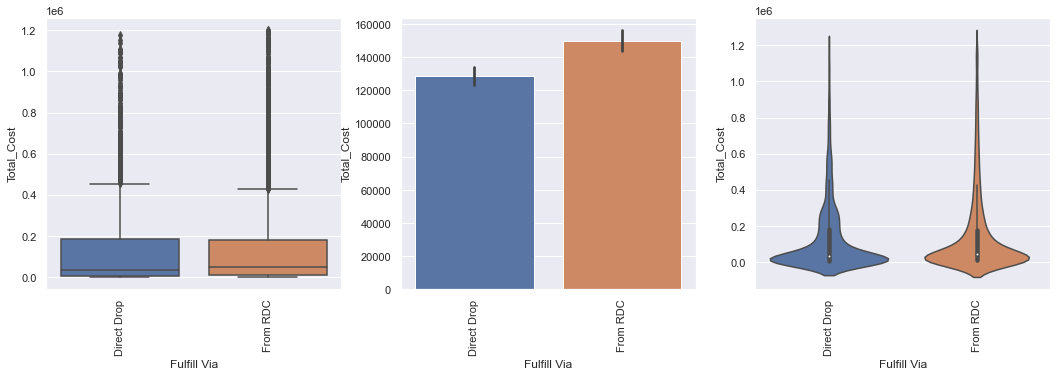

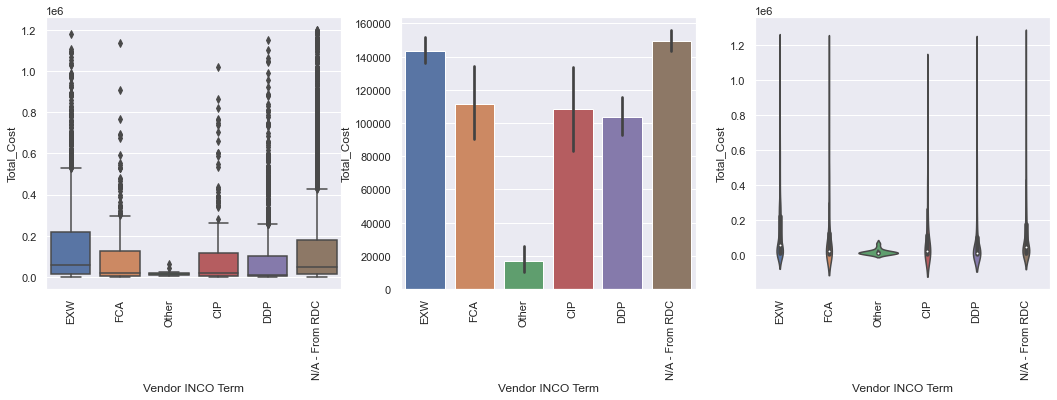

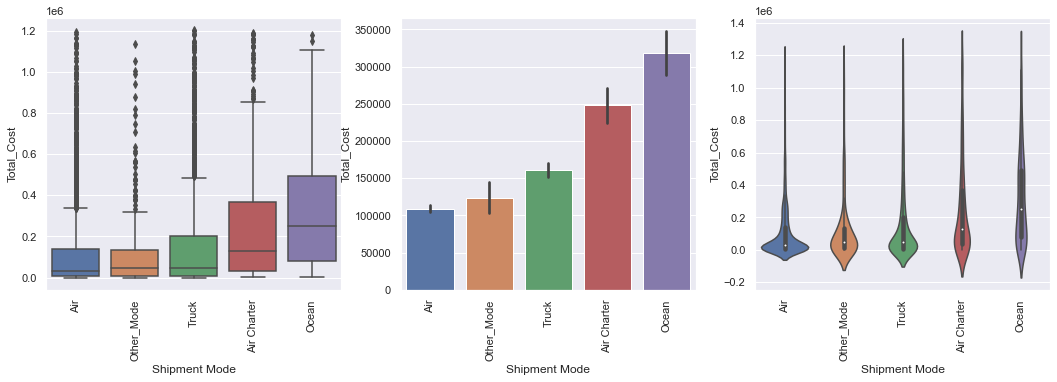

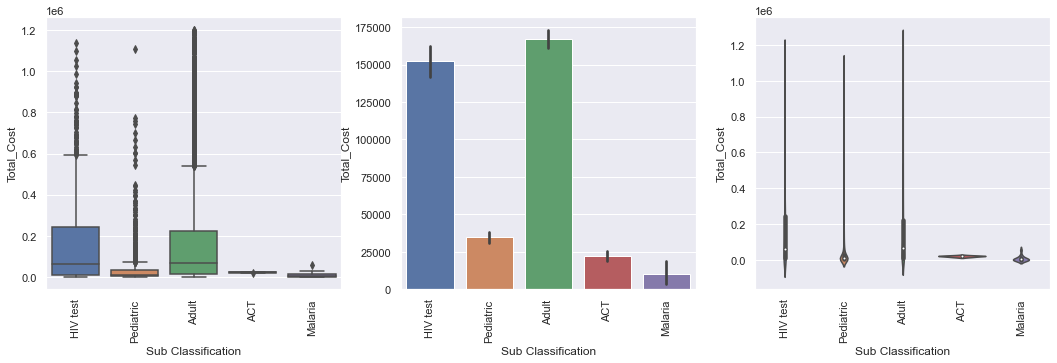

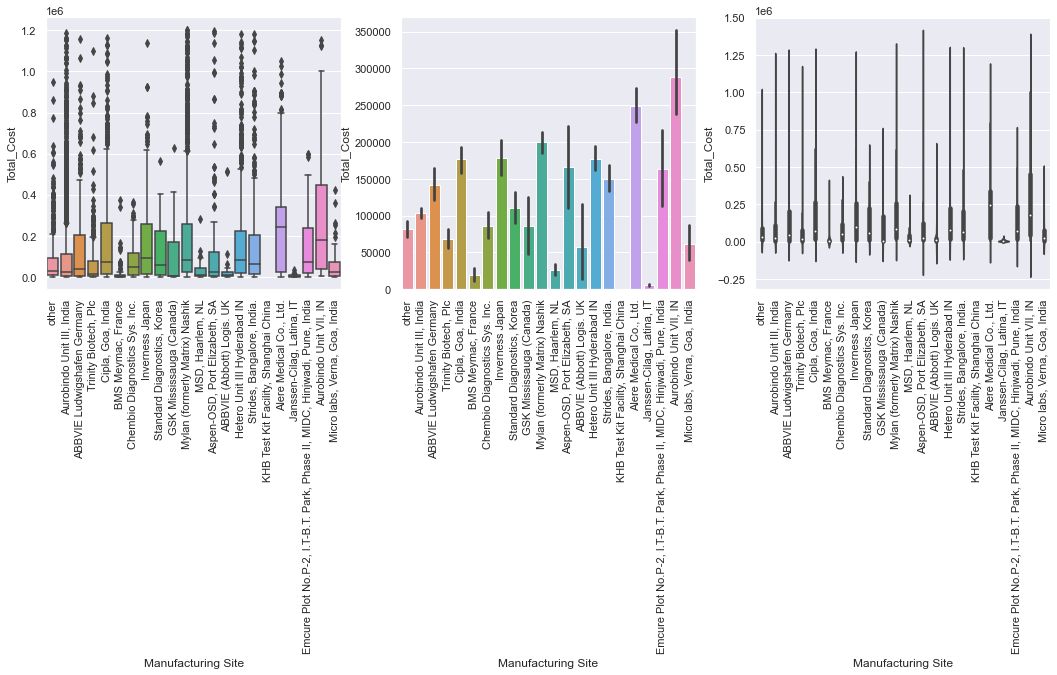

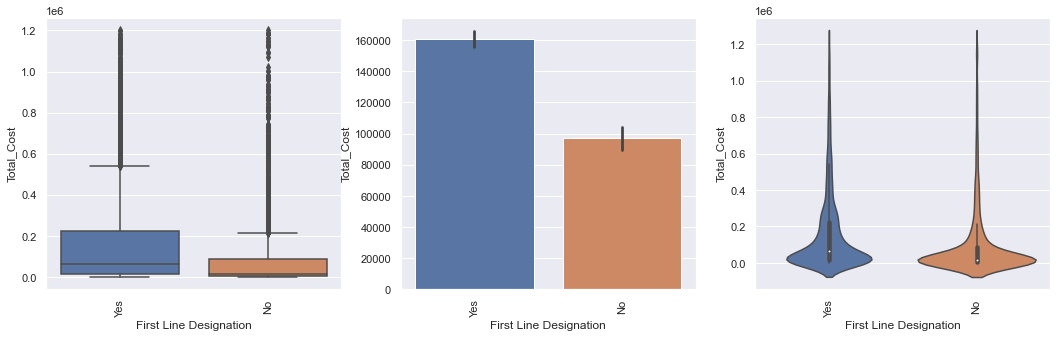

In [1413]:
# Plotting categorical columns vs. Target column

f_cat = cat_col.columns[:]

for i in enumerate(f_cat):
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(131)
    sns.boxplot(x = cat_col[i[1]], y= df.Total_Cost)
    plt.xticks(rotation=90)

    ax1 = f.add_subplot(132)
    sns.barplot(x = cat_col[i[1]], y= df.Total_Cost)
    plt.xticks(rotation=90)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(x = cat_col[i[1]], y= df.Total_Cost, orient= 'vertical')
    plt.xticks(rotation=90)
    plt.show()

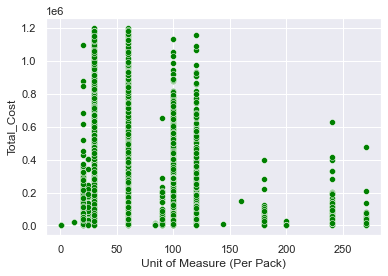

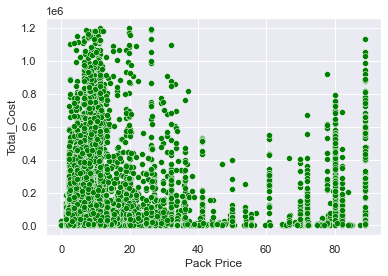

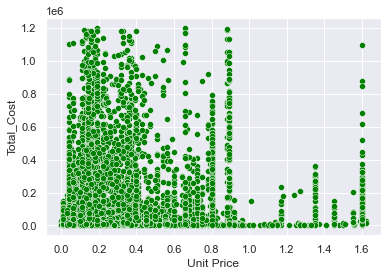

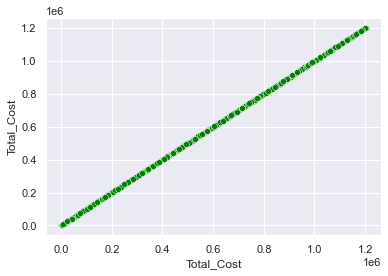

In [1414]:
# Plotting numerical columns vs. Target column

f_num = num_col.columns[:-1]

for i in enumerate(f_num):

    sns.scatterplot(num_col[i[1]], y= df.Total_Cost, color= 'Green')
    plt.show()

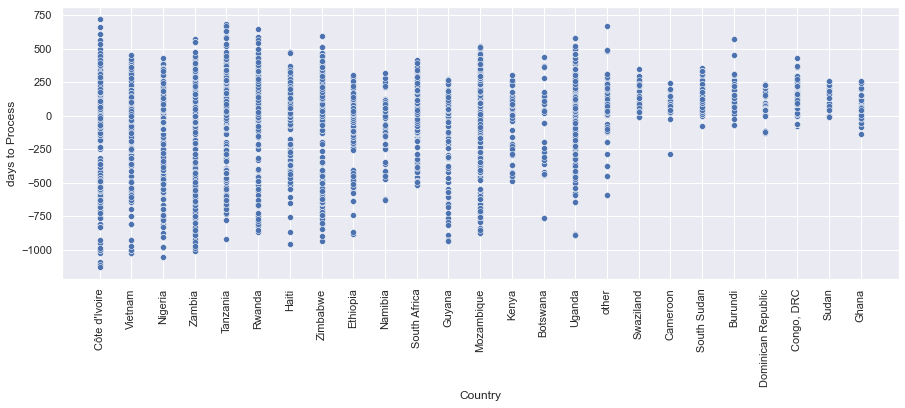

In [1415]:
# Plotting Country vs days to Process
plt.figure(figsize=(15,5))
sns.scatterplot(df['Country'], df['days to Process'])
plt.xticks(rotation=90)
plt.show()

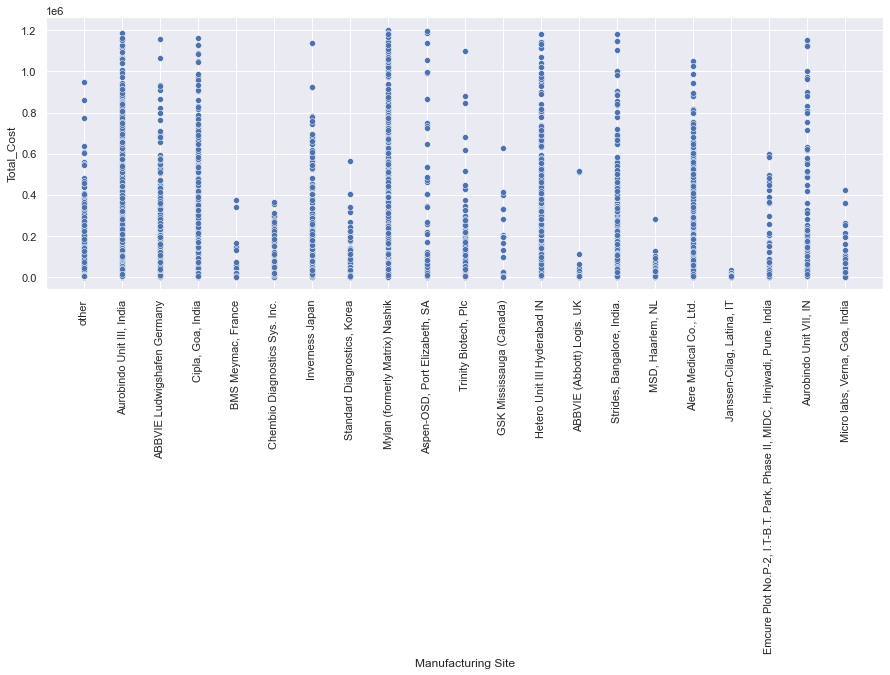

In [1416]:
# Plotting Country vs. Total_Cost 
plt.figure(figsize=(15,5))
sns.scatterplot(df['Manufacturing Site'], df['Total_Cost'])
plt.xticks(rotation=90)
plt.show()

## Data Visualization (Bi-Variate)

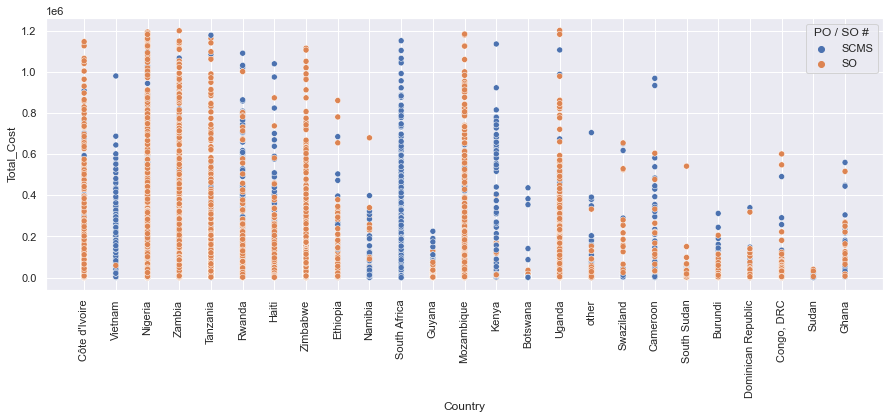

In [1417]:
# Plotting Country vs. Total_Cost vs Po / SO #

plt.figure(figsize=(15,5))
sns.scatterplot(df['Country'], df.Total_Cost, hue = df['PO / SO #'])
plt.xticks(rotation=90)
plt.show()

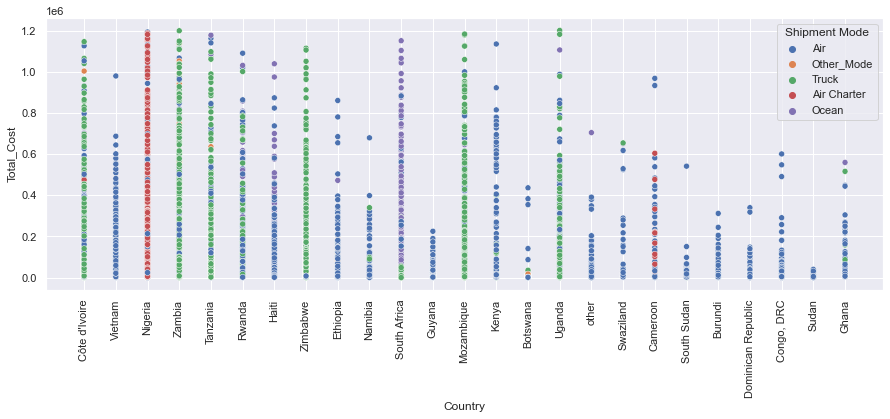

In [1418]:
# Plotting Country vs. Total_Cost vs Shipment Mode

plt.figure(figsize=(15,5))
sns.scatterplot(df['Country'], df.Total_Cost, hue = df['Shipment Mode'])
plt.xticks(rotation=90)
plt.show()

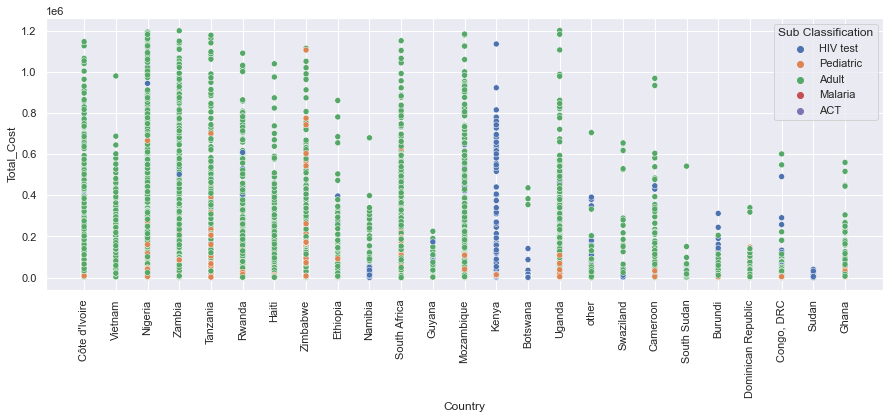

In [1419]:
# Plotting Country vs. Total_Cost vs Sub Classification

plt.figure(figsize=(15,5))
sns.scatterplot(df['Country'],df.Total_Cost, hue = df['Sub Classification'])
plt.xticks(rotation=90)
plt.show()

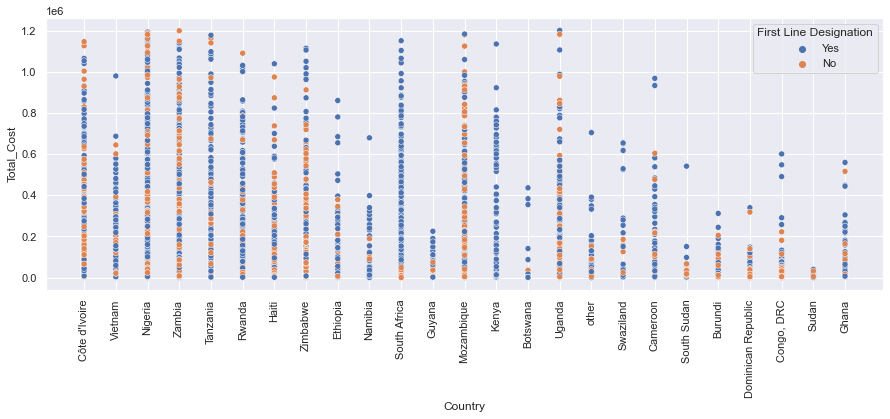

In [1420]:
# Plotting Country vs. Total_Cost vs First Line Designation

plt.figure(figsize=(15,5))
sns.scatterplot(df['Country'],df.Total_Cost, hue = df['First Line Designation'])
plt.xticks(rotation=90)
plt.show()

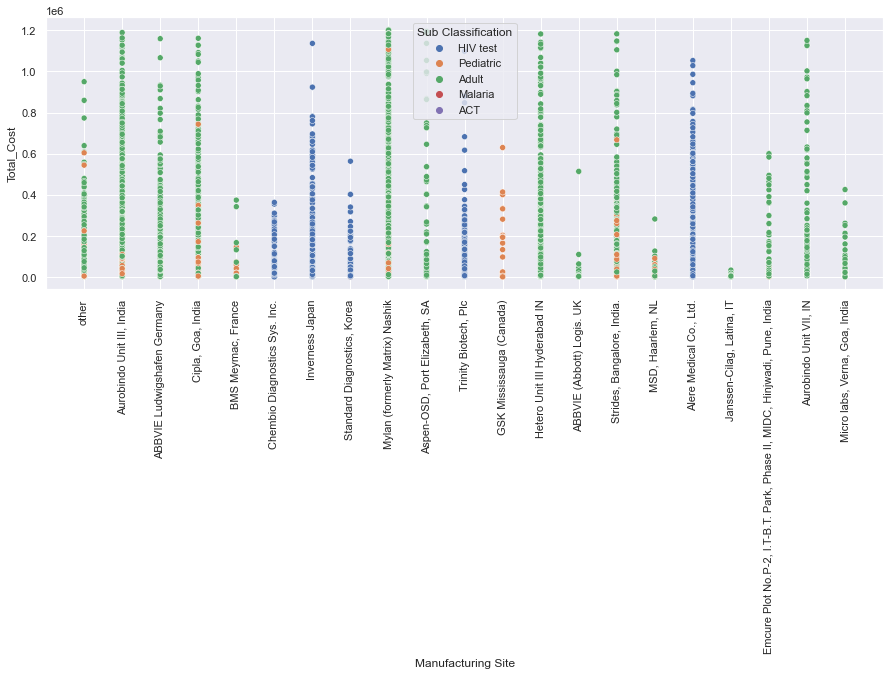

In [1421]:
# Plotting Country vs. Total_Cost vs First Line Designation

plt.figure(figsize=(15,5))
sns.scatterplot(df['Manufacturing Site'],df.Total_Cost, hue = df['Sub Classification'])
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

In [1422]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
0  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
1  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
2  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
3  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
4  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   

  Vendor INCO Term Shipment Mode Sub Classification  \
0              EXW           Air           HIV test   
1              EXW           Air          Pediatric   
2              FCA           Air           HIV test   
3              EXW           Air              Adult   
4              EXW           Air              Adult   

   Unit of Measure (Per Pack)  Pack Price  Unit Price  \
0                          30       29.00        0.97   
1                         240        6.20        0.03   
2                         100       80.00        0.80   
3                          60        3.99        0.07   
4                          60        3.20        0.05   

          Manufacturing Site First Line Designation  Total_Cost  \
0                      other                    Yes     1378.38   
1  Aurobindo Unit III, India                    Yes    10768.54   
2                      other                    Yes    41700.82   
3                      other                    Yes   143414.90   
4  Aurobindo Unit III, India                    Yes   167097.12   

   days to Process  
0          -1095.0  
1           -930.0  
2          -1009.0  
3          -1004.0  
4          -1025.0

In [1423]:
# Converting Nominal data columns using dummiy variables

PQ = pd.get_dummies(df['PQ #'], drop_first=True)
df = pd.concat([df, PQ], axis = 1)

PO_SO = pd.get_dummies(df['PO / SO #'],prefix ='PO_SO', drop_first=True)
df = pd.concat([df, PO_SO], axis = 1)

ASN_DN = pd.get_dummies(df['ASN/DN #'],prefix ='ASN_DN', drop_first=True)
df = pd.concat([df, ASN_DN], axis = 1)

Country = pd.get_dummies(df['Country'],prefix ='Country', drop_first=True)
df = pd.concat([df, Country], axis = 1)

Fulfill_Via = pd.get_dummies(df['Fulfill Via'],prefix ='Fulfill_Via', drop_first=True)
df = pd.concat([df, Fulfill_Via], axis = 1)

Vendor_INCO_Term = pd.get_dummies(df['Vendor INCO Term'],prefix ='Vendor_INCO_Term', drop_first=True)
df = pd.concat([df, Vendor_INCO_Term], axis = 1)

Shipment_Mode = pd.get_dummies(df['Shipment Mode'],prefix ='Shipment_Mode', drop_first=True)
df = pd.concat([df, Shipment_Mode], axis = 1)

Sub_Classification = pd.get_dummies(df['Sub Classification'],prefix ='Sub_Classification', drop_first=True)
df = pd.concat([df, Sub_Classification], axis = 1)

Manufacturing_Site = pd.get_dummies(df['Manufacturing Site'],prefix ='Manufacturing_Site', drop_first=True)
df = pd.concat([df, Manufacturing_Site], axis = 1)

First_Line_Designation = pd.get_dummies(df['First Line Designation'],prefix ='First_Line_Designation', drop_first=True)
df = pd.concat([df, First_Line_Designation], axis = 1)

In [1424]:
df.head()

PQ # PO / SO # ASN/DN #        Country  Fulfill Via  \
0  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
1  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
2  Pre-PQ Process      SCMS      ASN  Côte d'Ivoire  Direct Drop   
3  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   
4  Pre-PQ Process      SCMS      ASN        Vietnam  Direct Drop   

  Vendor INCO Term Shipment Mode Sub Classification  \
0              EXW           Air           HIV test   
1              EXW           Air          Pediatric   
2              FCA           Air           HIV test   
3              EXW           Air              Adult   
4              EXW           Air              Adult   

   Unit of Measure (Per Pack)  Pack Price  Unit Price  \
0                          30       29.00        0.97   
1                         240        6.20        0.03   
2                         100       80.00        0.80   
3                          60        3.99        0.07   
4                          60        3.20        0.05   

          Manufacturing Site First Line Designation  Total_Cost  \
0                      other                    Yes     1378.38   
1  Aurobindo Unit III, India                    Yes    10768.54   
2                      other                    Yes    41700.82   
3                      other                    Yes   143414.90   
4  Aurobindo Unit III, India                    Yes   167097.12   

   days to Process  Pre-PQ Process  PO_SO_SO  ASN_DN_DN  Country_Burundi  \
0          -1095.0               1         0          0                0   
1           -930.0               1         0          0                0   
2          -1009.0               1         0          0                0   
3          -1004.0               1         0          0                0   
4          -1025.0               1         0          0                0   

   Country_Cameroon  Country_Congo, DRC  Country_Côte d'Ivoire  \
0                 0                   0                      1   
1                 0                   0                      0   
2                 0                   0                      1   
3                 0                   0                      0   
4                 0                   0                      0   

   Country_Dominican Republic  Country_Ethiopia  Country_Ghana  \
0                           0                 0              0   
1                           0                 0              0   
2                           0                 0              0   
3                           0                 0              0   
4                           0                 0              0   

   Country_Guyana  Country_Haiti  Country_Kenya  Country_Mozambique  \
0               0              0              0                   0   
1               0              0              0                   0   
2               0              0              0                   0   
3               0              0              0                   0   
4               0              0              0                   0   

   Country_Namibia  Country_Nigeria  Country_Rwanda  Country_South Africa  \
0                0                0               0                     0   
1                0                0               0                     0   
2                0                0               0                     0   
3                0                0               0                     0   
4                0                0               0                     0   

   Country_South Sudan  Country_Sudan  Country_Swaziland  Country_Tanzania  \
0                    0              0                  0                 0   
1                    0              0                  0                 0   
2                    0              0                  0                 0   
3                    0              0                  0                 0

In [1426]:
# Dropping original columns whose dummiy variables are created

df = df.drop(['PQ #', 
              'PO / SO #', 
              'ASN/DN #', 
              'Country', 
              'Fulfill Via', 
              'Vendor INCO Term', 
              'Shipment Mode',
              'Sub Classification', 
              'Manufacturing Site', 
              'First Line Designation'], axis= 1)

In [1427]:
df.head()

Unit of Measure (Per Pack)  Pack Price  Unit Price  Total_Cost  \
0                          30       29.00        0.97     1378.38   
1                         240        6.20        0.03    10768.54   
2                         100       80.00        0.80    41700.82   
3                          60        3.99        0.07   143414.90   
4                          60        3.20        0.05   167097.12   

   days to Process  Pre-PQ Process  PO_SO_SO  ASN_DN_DN  Country_Burundi  \
0          -1095.0               1         0          0                0   
1           -930.0               1         0          0                0   
2          -1009.0               1         0          0                0   
3          -1004.0               1         0          0                0   
4          -1025.0               1         0          0                0   

   Country_Cameroon  Country_Congo, DRC  Country_Côte d'Ivoire  \
0                 0                   0                      1   
1                 0                   0                      0   
2                 0                   0                      1   
3                 0                   0                      0   
4                 0                   0                      0   

   Country_Dominican Republic  Country_Ethiopia  Country_Ghana  \
0                           0                 0              0   
1                           0                 0              0   
2                           0                 0              0   
3                           0                 0              0   
4                           0                 0              0   

   Country_Guyana  Country_Haiti  Country_Kenya  Country_Mozambique  \
0               0              0              0                   0   
1               0              0              0                   0   
2               0              0              0                   0   
3               0              0              0                   0   
4               0              0              0                   0   

   Country_Namibia  Country_Nigeria  Country_Rwanda  Country_South Africa  \
0                0                0               0                     0   
1                0                0               0                     0   
2                0                0               0                     0   
3                0                0               0                     0   
4                0                0               0                     0   

   Country_South Sudan  Country_Sudan  Country_Swaziland  Country_Tanzania  \
0                    0              0                  0                 0   
1                    0              0                  0                 0   
2                    0              0                  0                 0   
3                    0              0                  0                 0   
4                    0              0                  0                 0   

   Country_Uganda  Country_Vietnam  Country_Zambia  Country_Zimbabwe  \
0               0                0               0                 0   
1               0                1               0                 0   
2               0                0               0                 0   
3               0                1               0                 0   
4               0                1               0                 0   

   Country_other  Fulfill_Via_From RDC  Vendor_INCO_Term_DDP  \
0              0                     0                     0   
1              0                     0                     0   
2              0                     0                     0   
3              0                     0                     0   
4              0                     0                     0   

   Vendor_INCO_Term_EXW  Vendor_INCO_Term_FCA  \
0                     1                     0   
1                     1                     0   
2            

In [1428]:
df.shape

(8904, 67)

In [1429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8904 entries, 0 to 10323
Data columns (total 67 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Unit of Measure (Per Pack)                                                                   8904 non-null   int64  
 1   Pack Price                                                                                   8904 non-null   float64
 2   Unit Price                                                                                   8904 non-null   float64
 3   Total_Cost                                                                                   8904 non-null   float64
 4   days to Process                                                                              8904 non-null   float64
 5   Pre-PQ Process                   

<AxesSubplot:>

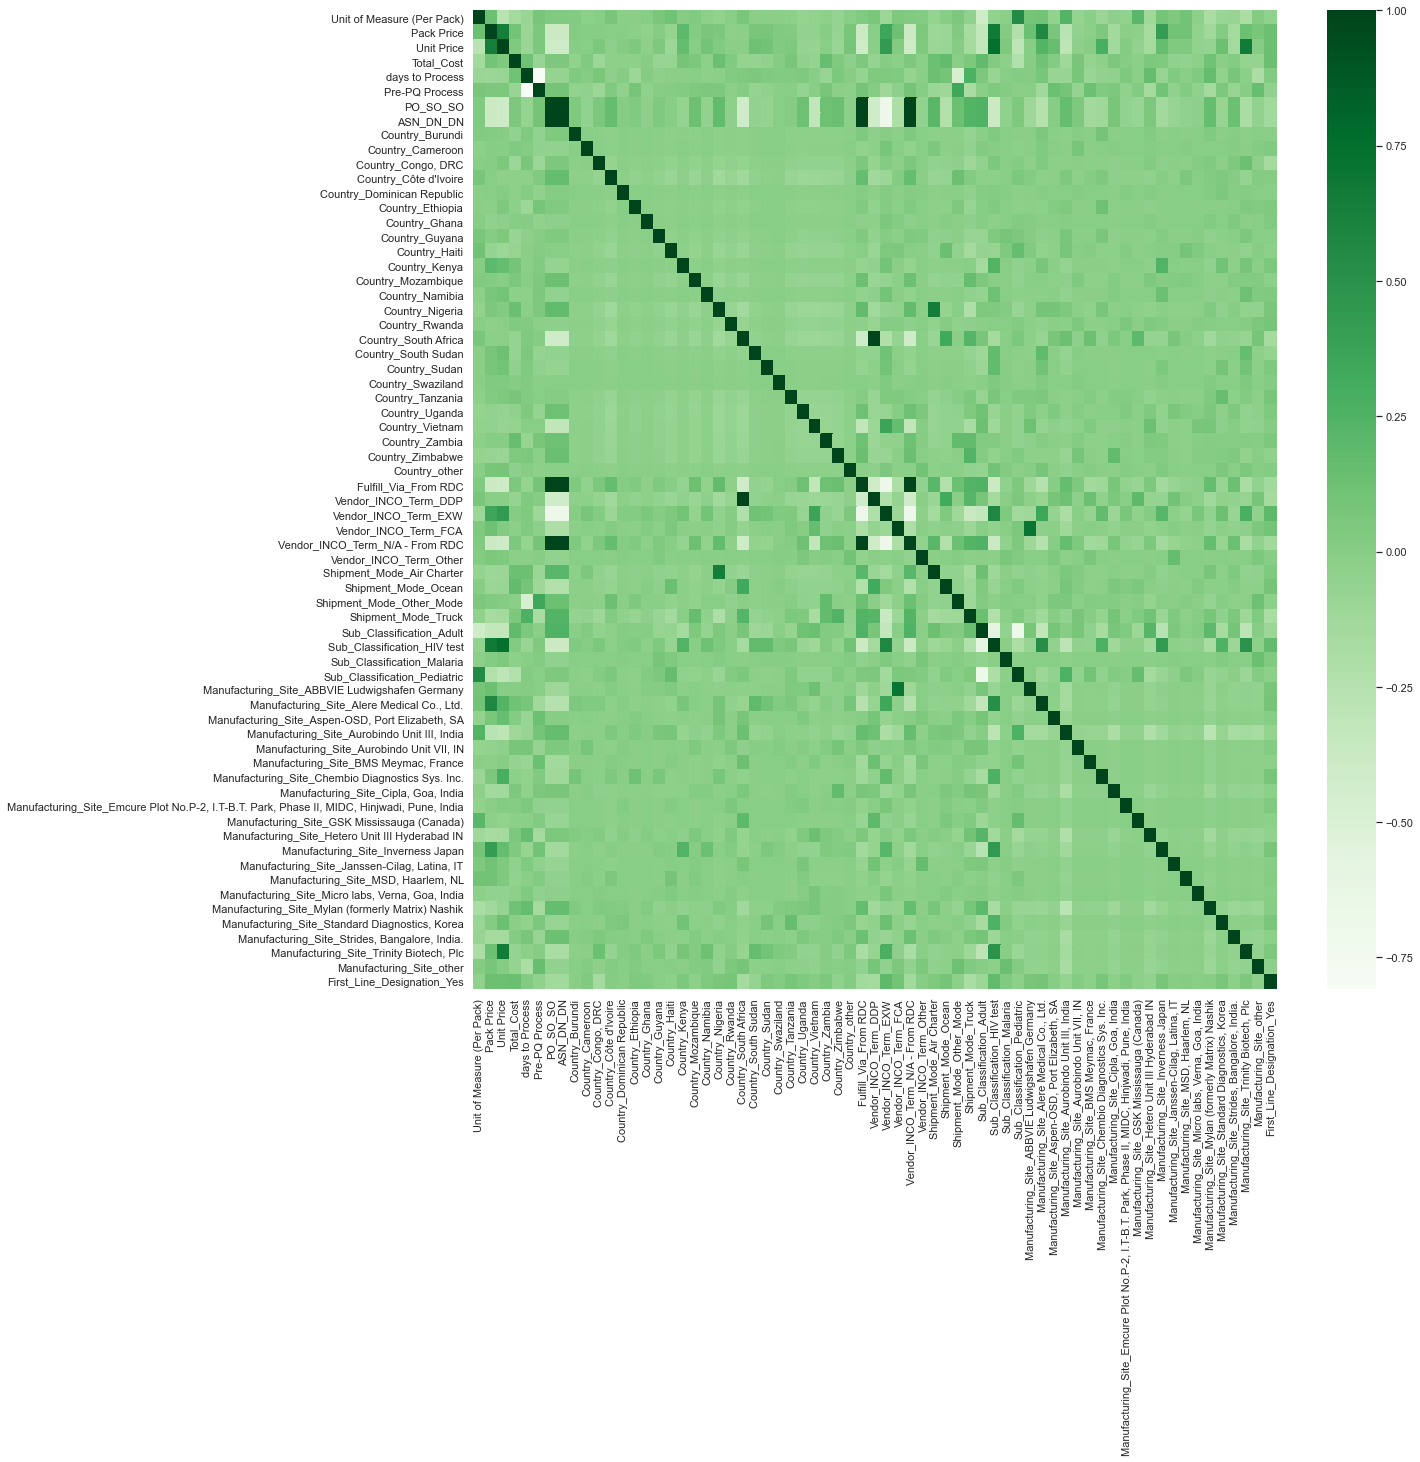

In [1439]:
# Checking correlation
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cmap='Greens')

In [1441]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print()
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations

ASN_DN_DN             Fulfill_Via_From RDC               1.0
                      Vendor_INCO_Term_N/A - From RDC    1.0
Fulfill_Via_From RDC  Vendor_INCO_Term_N/A - From RDC    1.0
dtype: float64


#### We will use dimenstionality reduction techniques to reduce number of columns

## Data Pre-Processing

In [1443]:
# Train-test split

from sklearn.model_selection import train_test_split

In [1444]:
# Splitting dataset into train and test with train size 0.7

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(6232, 67)
(2672, 67)


In [1445]:
# Checking numerical columns for scaling.

df_train.describe()

Unit of Measure (Per Pack)   Pack Price   Unit Price    Total_Cost  \
count                 6232.000000  6232.000000  6232.000000  6.232000e+03   
mean                    72.390244    17.727547     0.329917  1.395004e+05   
std                     56.740231    22.407554     0.397044  2.124560e+05   
min                      1.000000     0.000000     0.000000  4.185000e+02   
25%                     30.000000     3.890000     0.070000  9.188892e+03   
50%                     60.000000     8.260000     0.160000  4.153153e+04   
75%                     90.000000    20.070000     0.410000  1.816721e+05   
max                    270.000000    89.110000     1.620000  1.202294e+06   

       days to Process  Pre-PQ Process     PO_SO_SO    ASN_DN_DN  \
count      6232.000000     6232.000000  6232.000000  6232.000000   
mean         35.631900        0.239570     0.556162     0.556162   
std         280.821615        0.426855     0.496876     0.496876   
min       -1126.000000        0.000000     0.000000     0.000000   
25%         -22.000000        0.000000     0.000000     0.000000   
50%         111.000000        0.000000     1.000000     1.000000   
75%         202.000000        0.000000     1.000000     1.000000   
max         718.000000        1.000000     1.000000     1.000000   

       Country_Burundi  Country_Cameroon  Country_Congo, DRC  \
count      6232.000000       6232.000000         6232.000000   
mean          0.011714          0.007060            0.035302   
std           0.107603          0.083735            0.184556   
min           0.000000          0.000000            0.000000   
25%           0.000000          0.000000            0.000000   
50%           0.000000          0.000000            0.000000   
75%           0.000000          0.000000            0.000000   
max           1.000000          1.000000            1.000000   

       Country_Côte d'Ivoire  Country_Dominican Republic  Country_Ethiopia  \
count            6232.000000                 6232.000000       6232.000000   
mean                0.112965                    0.004493          0.018453   
std                 0.316576                    0.066884          0.134594   
min                 0.000000                    0.000000          0.000000   
25%                 0.000000                    0.000000          0.000000   
50%                 0.000000                    0.000000          0.000000   
75%                 0.000000                    0.000000          0.000000   
max                 1.000000                    1.000000          1.000000   

       Country_Ghana  Country_Guyana  Country_Haiti  Country_Kenya  \
count    6232.000000     6232.000000    6232.000000    6232.000000   
mean        0.005135        0.024711       0.060173       0.011393   
std         0.071479        0.155256       0.237827       0.106136   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000       0.000000       0.000000   
50%         0.000000        0.000000       0.000000       0.000000   
75%         0.000000        0.000000       0.000000       0.000000   
max         1.000000        1.000000       1.000000       1.000000   

       Country_Mozambique  Country_Namibia  Country_Nigeria  Country_Rwanda  \
count         6232.000000      6232.000000      6232.000000     6232.000000   
mean             0.059531         0.010109         0.115693        0.042843   
std              0.236636         0.100043         0.319882        0.202520   
min              0.000000         0.000000         0.000000        0.000000   
25%              0.000000         0.000000         0.000000        0.000000   
50%              0.000000         0.000000         0.000000        0.000000   
75%              0.000000         0.000000         0.000000        0.000000   
max              1.000000         1.000000         1.000000        1.000000   

       Country_South Africa  Country_South Sudan  Country_Sudan  \
count     

In [1446]:
df_test.describe()

Unit of Measure (Per Pack)   Pack Price   Unit Price    Total_Cost  \
count                 2672.000000  2672.000000  2672.000000  2.672000e+03   
mean                    71.148952    17.083215     0.315659  1.421005e+05   
std                     55.317486    22.128229     0.379726  2.142699e+05   
min                      1.000000     0.000000     0.000000  4.149300e+02   
25%                     30.000000     3.750000     0.070000  8.737248e+03   
50%                     60.000000     8.145000     0.150000  4.133460e+04   
75%                     60.000000    19.920000     0.400000  1.846775e+05   
max                    270.000000    89.000000     1.620000  1.183571e+06   

       days to Process  Pre-PQ Process     PO_SO_SO    ASN_DN_DN  \
count      2672.000000     2672.000000  2672.000000  2672.000000   
mean         32.580838        0.249251     0.553518     0.553518   
std         287.686018        0.432661     0.497221     0.497221   
min       -1118.000000        0.000000     0.000000     0.000000   
25%         -41.000000        0.000000     0.000000     0.000000   
50%         115.000000        0.000000     1.000000     1.000000   
75%         208.000000        0.000000     1.000000     1.000000   
max         666.000000        1.000000     1.000000     1.000000   

       Country_Burundi  Country_Cameroon  Country_Congo, DRC  \
count      2672.000000       2672.000000         2672.000000   
mean          0.008608          0.006737            0.032560   
std           0.092395          0.081815            0.177515   
min           0.000000          0.000000            0.000000   
25%           0.000000          0.000000            0.000000   
50%           0.000000          0.000000            0.000000   
75%           0.000000          0.000000            0.000000   
max           1.000000          1.000000            1.000000   

       Country_Côte d'Ivoire  Country_Dominican Republic  Country_Ethiopia  \
count            2672.000000                 2672.000000       2672.000000   
mean                0.101048                    0.004865          0.019087   
std                 0.301449                    0.069595          0.136856   
min                 0.000000                    0.000000          0.000000   
25%                 0.000000                    0.000000          0.000000   
50%                 0.000000                    0.000000          0.000000   
75%                 0.000000                    0.000000          0.000000   
max                 1.000000                    1.000000          1.000000   

       Country_Ghana  Country_Guyana  Country_Haiti  Country_Kenya  \
count    2672.000000     2672.000000    2672.000000    2672.000000   
mean        0.005988        0.020584       0.062500       0.010479   
std         0.077165        0.142013       0.242107       0.101848   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000       0.000000       0.000000   
50%         0.000000        0.000000       0.000000       0.000000   
75%         0.000000        0.000000       0.000000       0.000000   
max         1.000000        1.000000       1.000000       1.000000   

       Country_Mozambique  Country_Namibia  Country_Nigeria  Country_Rwanda  \
count         2672.000000      2672.000000      2672.000000     2672.000000   
mean             0.067365         0.004865         0.121257        0.043787   
std              0.250700         0.069595         0.326487        0.204660   
min              0.000000         0.000000         0.000000        0.000000   
25%              0.000000         0.000000         0.000000        0.000000   
50%              0.000000         0.000000         0.000000        0.000000   
75%              0.000000         0.000000         0.000000        0.000000   
max              1.000000         1.000000         1.000000        1.000000   

       Country_South Africa  Country_South Sudan  Country_Sudan  \
count     

##  Feature Scaling

In [1447]:
# Importing Sklearn library for scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [1448]:
# Instantiate an object

scaler = MinMaxScaler()

df_train_sc = scaler.fit_transform(df_train)

df_test_sc = scaler.transform(df_test)

In [1449]:
df_train_sc = pd.DataFrame(df_train_sc, columns = df_train.columns)
df_train_sc.head()

Unit of Measure (Per Pack)  Pack Price  Unit Price  Total_Cost  \
0                    0.219331    0.126024    0.117284    0.006524   
1                    0.107807    0.052407    0.098765    0.214827   
2                    0.368030    0.998766    0.549383    0.739499   
3                    0.107807    0.139378    0.253086    0.349744   
4                    0.219331    0.026147    0.024691    0.045490   

   days to Process  Pre-PQ Process  PO_SO_SO  ASN_DN_DN  Country_Burundi  \
0         0.611171             0.0       1.0        1.0              0.0   
1         0.652928             0.0       0.0        0.0              0.0   
2         0.678416             0.0       0.0        0.0              0.0   
3         0.379610             1.0       1.0        1.0              0.0   
4         0.771150             0.0       1.0        1.0              0.0   

   Country_Cameroon  Country_Congo, DRC  Country_Côte d'Ivoire  \
0               0.0                 0.0                    0.0   
1               0.0                 0.0                    0.0   
2               0.0                 0.0                    0.0   
3               0.0                 0.0                    0.0   
4               0.0                 0.0                    0.0   

   Country_Dominican Republic  Country_Ethiopia  Country_Ghana  \
0                         0.0               0.0            0.0   
1                         0.0               0.0            0.0   
2                         0.0               0.0            0.0   
3                         0.0               0.0            0.0   
4                         0.0               0.0            0.0   

   Country_Guyana  Country_Haiti  Country_Kenya  Country_Mozambique  \
0             1.0            0.0            0.0                 0.0   
1             0.0            0.0            0.0                 0.0   
2             0.0            0.0            0.0                 0.0   
3             0.0            0.0            0.0                 0.0   
4             0.0            0.0            0.0                 0.0   

   Country_Namibia  Country_Nigeria  Country_Rwanda  Country_South Africa  \
0              0.0              0.0             0.0                   0.0   
1              0.0              0.0             0.0                   1.0   
2              0.0              1.0             0.0                   0.0   
3              0.0              0.0             0.0                   0.0   
4              0.0              1.0             0.0                   0.0   

   Country_South Sudan  Country_Sudan  Country_Swaziland  Country_Tanzania  \
0                  0.0            0.0                0.0               0.0   
1                  0.0            0.0                0.0               0.0   
2                  0.0            0.0                0.0               0.0   
3                  0.0            0.0                0.0               1.0   
4                  0.0            0.0                0.0               0.0   

   Country_Uganda  Country_Vietnam  Country_Zambia  Country_Zimbabwe  \
0             0.0              0.0             0.0               0.0   
1             0.0              0.0             0.0               0.0   
2             0.0              0.0             0.0               0.0   
3             0.0              0.0             0.0               0.0   
4             0.0              0.0             0.0               0.0   

   Country_other  Fulfill_Via_From RDC  Vendor_INCO_Term_DDP  \
0            0.0                   1.0                   0.0   
1            0.0                   0.0                   1.0   
2            0.0                   0.0                   0.0   
3            0.0                   1.0                   0.0   
4            0.0                   1.0                   0.0   

   Vendor_INCO_Term_EXW  Vendor_INCO_Term_FCA  \
0                   0.0                   0.0   
1                   0.0                   0.0   
2            

In [1450]:
df_test_sc = pd.DataFrame(df_test_sc, columns = df_test.columns)
df_test_sc.head()

Unit of Measure (Per Pack)  Pack Price  Unit Price  Total_Cost  \
0                    0.219331    0.043654    0.037037    0.026574   
1                    0.070632    0.359107    0.987654    0.014582   
2                    0.107807    0.175065    0.320988    0.001276   
3                    0.107807    0.051509    0.092593    0.062218   
4                    0.219331    0.048479    0.043210    0.020904   

   days to Process  Pre-PQ Process  PO_SO_SO  ASN_DN_DN  Country_Burundi  \
0         0.768980             0.0       1.0        1.0              0.0   
1         0.723427             0.0       0.0        0.0              0.0   
2         0.713124             0.0       0.0        0.0              0.0   
3         0.772234             0.0       1.0        1.0              0.0   
4         0.719631             0.0       1.0        1.0              0.0   

   Country_Cameroon  Country_Congo, DRC  Country_Côte d'Ivoire  \
0               0.0                 0.0                    1.0   
1               0.0                 0.0                    0.0   
2               0.0                 0.0                    0.0   
3               0.0                 0.0                    0.0   
4               0.0                 0.0                    0.0   

   Country_Dominican Republic  Country_Ethiopia  Country_Ghana  \
0                         0.0               0.0            0.0   
1                         0.0               0.0            0.0   
2                         0.0               0.0            0.0   
3                         0.0               0.0            0.0   
4                         0.0               0.0            0.0   

   Country_Guyana  Country_Haiti  Country_Kenya  Country_Mozambique  \
0             0.0            0.0            0.0                 0.0   
1             0.0            0.0            0.0                 0.0   
2             0.0            0.0            0.0                 0.0   
3             0.0            0.0            0.0                 1.0   
4             0.0            0.0            0.0                 1.0   

   Country_Namibia  Country_Nigeria  Country_Rwanda  Country_South Africa  \
0              0.0              0.0             0.0                   0.0   
1              0.0              0.0             0.0                   0.0   
2              0.0              0.0             0.0                   1.0   
3              0.0              0.0             0.0                   0.0   
4              0.0              0.0             0.0                   0.0   

   Country_South Sudan  Country_Sudan  Country_Swaziland  Country_Tanzania  \
0                  0.0            0.0                0.0               0.0   
1                  1.0            0.0                0.0               0.0   
2                  0.0            0.0                0.0               0.0   
3                  0.0            0.0                0.0               0.0   
4                  0.0            0.0                0.0               0.0   

   Country_Uganda  Country_Vietnam  Country_Zambia  Country_Zimbabwe  \
0             0.0              0.0             0.0               0.0   
1             0.0              0.0             0.0               0.0   
2             0.0              0.0             0.0               0.0   
3             0.0              0.0             0.0               0.0   
4             0.0              0.0             0.0               0.0   

   Country_other  Fulfill_Via_From RDC  Vendor_INCO_Term_DDP  \
0            0.0                   1.0                   0.0   
1            0.0                   0.0                   0.0   
2            0.0                   0.0                   1.0   
3            0.0                   1.0                   0.0   
4            0.0                   1.0                   0.0   

   Vendor_INCO_Term_EXW  Vendor_INCO_Term_FCA  \
0                   0.0                   0.0   
1                   1.0                   0.0   
2            

### Defining X_train & y_train for model building

In [1451]:
# Defining the X_train, y_train

y_train_sc = df_train_sc['Total_Cost']
X_train_sc = df_train_sc.drop('Total_Cost',axis=1)
y_test_sc = df_test_sc['Total_Cost']
X_test_sc = df_test_sc.drop('Total_Cost',axis=1)

In [1452]:
X_train_sc.head()

Unit of Measure (Per Pack)  Pack Price  Unit Price  days to Process  \
0                    0.219331    0.126024    0.117284         0.611171   
1                    0.107807    0.052407    0.098765         0.652928   
2                    0.368030    0.998766    0.549383         0.678416   
3                    0.107807    0.139378    0.253086         0.379610   
4                    0.219331    0.026147    0.024691         0.771150   

   Pre-PQ Process  PO_SO_SO  ASN_DN_DN  Country_Burundi  Country_Cameroon  \
0             0.0       1.0        1.0              0.0               0.0   
1             0.0       0.0        0.0              0.0               0.0   
2             0.0       0.0        0.0              0.0               0.0   
3             1.0       1.0        1.0              0.0               0.0   
4             0.0       1.0        1.0              0.0               0.0   

   Country_Congo, DRC  Country_Côte d'Ivoire  Country_Dominican Republic  \
0                 0.0                    0.0                         0.0   
1                 0.0                    0.0                         0.0   
2                 0.0                    0.0                         0.0   
3                 0.0                    0.0                         0.0   
4                 0.0                    0.0                         0.0   

   Country_Ethiopia  Country_Ghana  Country_Guyana  Country_Haiti  \
0               0.0            0.0             1.0            0.0   
1               0.0            0.0             0.0            0.0   
2               0.0            0.0             0.0            0.0   
3               0.0            0.0             0.0            0.0   
4               0.0            0.0             0.0            0.0   

   Country_Kenya  Country_Mozambique  Country_Namibia  Country_Nigeria  \
0            0.0                 0.0              0.0              0.0   
1            0.0                 0.0              0.0              0.0   
2            0.0                 0.0              0.0              1.0   
3            0.0                 0.0              0.0              0.0   
4            0.0                 0.0              0.0              1.0   

   Country_Rwanda  Country_South Africa  Country_South Sudan  Country_Sudan  \
0             0.0                   0.0                  0.0            0.0   
1             0.0                   1.0                  0.0            0.0   
2             0.0                   0.0                  0.0            0.0   
3             0.0                   0.0                  0.0            0.0   
4             0.0                   0.0                  0.0            0.0   

   Country_Swaziland  Country_Tanzania  Country_Uganda  Country_Vietnam  \
0                0.0               0.0             0.0              0.0   
1                0.0               0.0             0.0              0.0   
2                0.0               0.0             0.0              0.0   
3                0.0               1.0             0.0              0.0   
4                0.0               0.0             0.0              0.0   

   Country_Zambia  Country_Zimbabwe  Country_other  Fulfill_Via_From RDC  \
0             0.0               0.0            0.0                   1.0   
1             0.0               0.0            0.0                   0.0   
2             0.0               0.0            0.0                   0.0   
3             0.0               0.0            0.0                   1.0   
4             0.0               0.0            0.0                   1.0   

   Vendor_INCO_Term_DDP  Vendor_INCO_Term_EXW  Vendor_INCO_Term_FCA  \
0                   0.0                   0.0                   0.0   
1                   1.0                   0.0                   0.0   
2                   0.0                   1.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                 

In [1453]:
y_train_sc.head()

0    0.006524
1    0.214827
2    0.739499
3    0.349744
4    0.045490
Name: Total_Cost, dtype: float64

## Linear Regression

Fitting a regression line through the training data using `statsmodels`.
by default, statsmodels fit a regression line passing through the origin. So adding a constant to explicitly fit using `sm.add_constant(X)`.

In [1454]:
# Importng statsmodels library for api

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [1455]:
# Linear model for X_train

X_train_lr = sm.add_constant(X_train_sc)

X_train_lr.head()

const  Unit of Measure (Per Pack)  Pack Price  Unit Price  days to Process  \
0    1.0                    0.219331    0.126024    0.117284         0.611171   
1    1.0                    0.107807    0.052407    0.098765         0.652928   
2    1.0                    0.368030    0.998766    0.549383         0.678416   
3    1.0                    0.107807    0.139378    0.253086         0.379610   
4    1.0                    0.219331    0.026147    0.024691         0.771150   

   Pre-PQ Process  PO_SO_SO  ASN_DN_DN  Country_Burundi  Country_Cameroon  \
0             0.0       1.0        1.0              0.0               0.0   
1             0.0       0.0        0.0              0.0               0.0   
2             0.0       0.0        0.0              0.0               0.0   
3             1.0       1.0        1.0              0.0               0.0   
4             0.0       1.0        1.0              0.0               0.0   

   Country_Congo, DRC  Country_Côte d'Ivoire  Country_Dominican Republic  \
0                 0.0                    0.0                         0.0   
1                 0.0                    0.0                         0.0   
2                 0.0                    0.0                         0.0   
3                 0.0                    0.0                         0.0   
4                 0.0                    0.0                         0.0   

   Country_Ethiopia  Country_Ghana  Country_Guyana  Country_Haiti  \
0               0.0            0.0             1.0            0.0   
1               0.0            0.0             0.0            0.0   
2               0.0            0.0             0.0            0.0   
3               0.0            0.0             0.0            0.0   
4               0.0            0.0             0.0            0.0   

   Country_Kenya  Country_Mozambique  Country_Namibia  Country_Nigeria  \
0            0.0                 0.0              0.0              0.0   
1            0.0                 0.0              0.0              0.0   
2            0.0                 0.0              0.0              1.0   
3            0.0                 0.0              0.0              0.0   
4            0.0                 0.0              0.0              1.0   

   Country_Rwanda  Country_South Africa  Country_South Sudan  Country_Sudan  \
0             0.0                   0.0                  0.0            0.0   
1             0.0                   1.0                  0.0            0.0   
2             0.0                   0.0                  0.0            0.0   
3             0.0                   0.0                  0.0            0.0   
4             0.0                   0.0                  0.0            0.0   

   Country_Swaziland  Country_Tanzania  Country_Uganda  Country_Vietnam  \
0                0.0               0.0             0.0              0.0   
1                0.0               0.0             0.0              0.0   
2                0.0               0.0             0.0              0.0   
3                0.0               1.0             0.0              0.0   
4                0.0               0.0             0.0              0.0   

   Country_Zambia  Country_Zimbabwe  Country_other  Fulfill_Via_From RDC  \
0             0.0               0.0            0.0                   1.0   
1             0.0               0.0            0.0                   0.0   
2             0.0               0.0            0.0                   0.0   
3             0.0               0.0            0.0                   1.0   
4             0.0               0.0            0.0                   1.0   

   Vendor_INCO_Term_DDP  Vendor_INCO_Term_EXW  Vendor_INCO_Term_FCA  \
0                   0.0                   0.0                   0.0   
1                   1.0                   0.0                   0.0   
2                   0.0                   1.0                   0.0   
3                   0.0                   0.0                   0.0  

In [1456]:
# Checking dimensions of y_train

y_train_sc.shape

(6232,)

In [1457]:
# Training OLS model

lr_sm = sm.OLS(y_train_sc,X_train_lr).fit()

In [1458]:
# Checking p-values

round(lr_sm.pvalues,4)

const                                                                                          0.2314
Unit of Measure (Per Pack)                                                                     0.9154
Pack Price                                                                                     0.0015
Unit Price                                                                                     0.0075
days to Process                                                                                0.0011
Pre-PQ Process                                                                                 0.5730
PO_SO_SO                                                                                       0.8834
ASN_DN_DN                                                                                      0.8834
Country_Burundi                                                                                0.3952
Country_Cameroon                                                                  

In [1459]:
#Backward Elimination 

cols = list(X_train_sc.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train_sc[cols]
    X_1 = sm.add_constant(X_1)
    lr = sm.OLS(y_train_sc,X_1).fit()
    p = pd.Series(lr.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Pack Price', 'Unit Price', 'days to Process', 'Country_Cameroon', "Country_Côte d'Ivoire", 'Country_Ethiopia', 'Country_Ghana', 'Country_Haiti', 'Country_Kenya', 'Country_Mozambique', 'Country_Nigeria', 'Country_Rwanda', 'Country_South Sudan', 'Country_Swaziland', 'Country_Tanzania', 'Country_Uganda', 'Country_Vietnam', 'Country_Zambia', 'Country_Zimbabwe', 'Shipment_Mode_Air Charter', 'Shipment_Mode_Ocean', 'Shipment_Mode_Truck', 'Sub_Classification_Adult', 'Manufacturing_Site_ABBVIE Ludwigshafen Germany', 'Manufacturing_Site_Alere Medical Co., Ltd.', 'Manufacturing_Site_Aurobindo Unit III, India', 'Manufacturing_Site_Aurobindo Unit VII, IN', 'Manufacturing_Site_Cipla, Goa, India', 'Manufacturing_Site_GSK Mississauga (Canada)', 'Manufacturing_Site_Hetero Unit III Hyderabad IN', 'Manufacturing_Site_Inverness Japan', 'Manufacturing_Site_Janssen-Cilag, Latina, IT', 'Manufacturing_Site_Mylan (formerly Matrix) Nashik', 'Manufacturing_Site_Strides, Bangalore, India.', 'First_Line_Designat

In [1460]:
# Training X_train and y_train with selected features

X_train_be = X_train_sc[selected_features_BE]
X_test_be = X_test_sc[selected_features_BE]

In [1461]:
# Building a linear regression model
lr = LinearRegression()

# Fitting
lr.fit(X_train_be,y_train_sc)

# Predictions
y_pred_train_be = lr.predict(X_train_be)

y_pred_test_be = lr.predict(X_test_be)

In [1463]:
# Check R2 score, rmse

from sklearn.metrics import r2_score,mean_squared_error

In [1464]:
# Function for adjusted r2_score

def adjusted_r2_score(data,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    n = data.shape[0]
    p = data.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [1465]:
# Function for rmse

def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [1466]:
#Evaluation 

print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_be))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_be))

R2 score of train data is  0.244883678997606
Adj. R2 score of train data is  0.2406181736336479
rmse score of train data is  0.15359668356463857

R2 score of test data is  0.25337343361725395
Adj. R2 score of train data is  0.24345995492856043
rmse score of test data is  0.15401832283413752


In [1467]:
#Storing results

results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])
results.loc[len(results)] = ['Linear Regression_BE',r2_score(y_train_sc,y_pred_train_be),
                             adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be),
                             rmse(y_train_sc,y_pred_train_be),r2_score(y_test_sc,y_pred_test_be),
                             adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be),rmse(y_test_sc,y_pred_test_be)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  Train_RMSE score  \
0  Linear Regression_BE        0.244884            0.240618          0.153597   

   Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0       0.253373            0.24346         0.154018

### Feature selection using RFE ( Recursive Feature Elimination)

In [1468]:
from sklearn.feature_selection import RFE

# Features

features = X_train_sc.columns.tolist()

nof_list = np.arange(1,len(features)+1)   

high_score=0

# Variable to store the optimum features

nof=0  

score_list =[]

for n in range(len(nof_list)):
    
    lr = LinearRegression()
    rfe = RFE(lr,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_sc,y_train_sc)
    X_test_rfe = rfe.transform(X_test_sc)
    lr.fit(X_train_rfe,y_train_sc)
    score = lr.score(X_test_rfe,y_test_sc)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 59
Score with 59 features: 0.257176


In [1469]:
#RFE with 8 features

lr = LinearRegression()

rfe = RFE(lr,8)

X_train_rfe = rfe.fit_transform(X_train_sc,y_train_sc)

X_test_rfe = rfe.transform(X_test_sc)

#Fitting the data to model

lr.fit(X_train_rfe,y_train_sc)  

temp = pd.Series(rfe.support_,index = features)

selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['days to Process', 'Country_Kenya', 'Country_Nigeria', 'Country_Zambia',
       'Shipment_Mode_Ocean', 'Sub_Classification_Adult',
       'Manufacturing_Site_Alere Medical Co., Ltd.',
       'Manufacturing_Site_Inverness Japan'],
      dtype='object')


In [1470]:
# predictions
y_pred_train_rfe = lr.predict(X_train_rfe)
y_pred_test_rfe = lr.predict(X_test_rfe)

In [1471]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_rfe))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rfe,y_train_sc,y_pred_train_rfe))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_rfe))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_rfe))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_rfe,y_test_sc,y_pred_test_rfe))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_rfe))

R2 score of train data is  0.16617612909634139
Adj. R2 score of train data is  0.16510420382440993
rmse score of train data is  0.16140317442151988

R2 score of test data is  0.16389758910296104
Adj. R2 score of train data is  0.16138582819902703
rmse score of test data is  0.1629860401040052


In [1472]:
#Storing results
results.loc[len(results)] = ['Linear Regression_RFE',r2_score(y_train_sc,y_pred_train_rfe),
                             adjusted_r2_score(X_train_rfe,y_train_sc,y_pred_train_rfe),
                             rmse(y_train_sc,y_pred_train_rfe),r2_score(y_test_sc,y_pred_test_rfe),
                             adjusted_r2_score(X_test_rfe,y_test_sc,y_pred_test_rfe),rmse(y_test_sc,y_pred_test_rfe)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0   Linear Regression_BE        0.244884            0.240618   
1  Linear Regression_RFE        0.166176            0.165104   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0          0.153597       0.253373           0.243460         0.154018  
1          0.161403       0.163898           0.161386         0.162986

### Feature selection using Lasso CV

In [1473]:
# Using Lasso regression CV

from sklearn.linear_model import LassoCV

reg = LassoCV()

reg.fit(X_train_sc, y_train_sc)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

print("Best score using built-in LassoCV: %f" %reg.score(X_train_sc,y_train_sc))

coef = pd.Series(reg.coef_, index = X_train_sc.columns)

Best alpha using built-in LassoCV: 0.000032
Best score using built-in LassoCV: 0.247339


In [1474]:
#Feature importance by Lasso
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 57 variables and eliminated the other 9 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

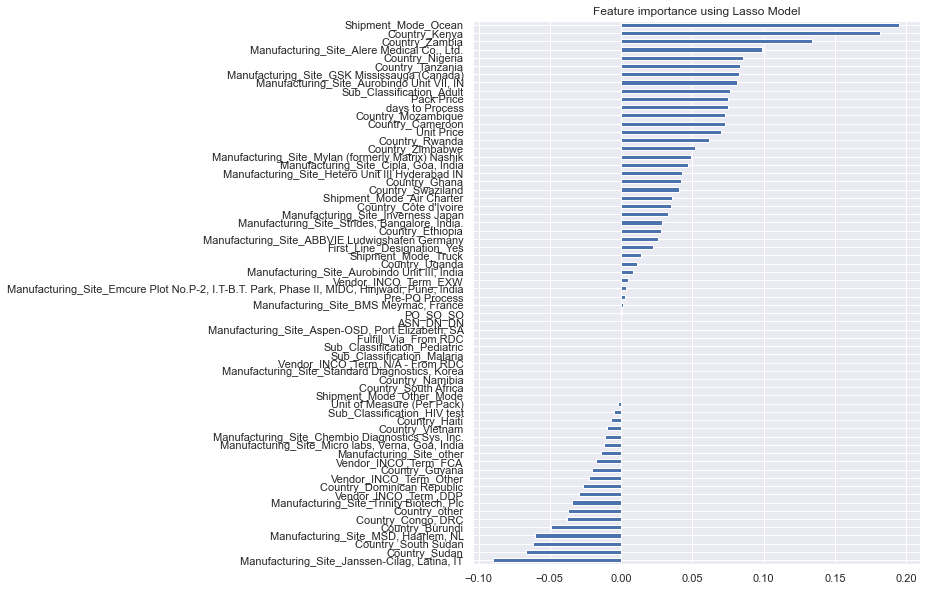

In [1475]:
#Visualization

imp_coef_lasso = coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_coef_lasso.plot(kind = "barh")

plt.title("Feature importance using Lasso Model")

In [1476]:
features_by_lasso = imp_coef_lasso

In [1477]:
#predictions on train data

y_pred_train_ls = reg.predict(X_train_sc)

#predictions on test data

y_pred_test_ls = reg.predict(X_test_sc)

In [1478]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_ls))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ls))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_ls))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_ls))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ls))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_ls))

R2 score of train data is  0.2473393244724713
Adj. R2 score of train data is  0.23928164327460977
rmse score of train data is  0.15334673124768866

R2 score of test data is  0.25674544081271977
Adj. R2 score of train data is  0.23791442319031653
rmse score of test data is  0.15367013095795215


In [1479]:
results.loc[len(results)] = ['Linear Regression_Lasso',r2_score(y_train_sc,y_pred_train_ls),
                             adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ls),
                             rmse(y_train_sc,y_pred_train_ls),r2_score(y_test_sc,y_pred_test_ls),
                             adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ls),rmse(y_test_sc,y_pred_test_ls)]

results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0     Linear Regression_BE        0.244884            0.240618   
1    Linear Regression_RFE        0.166176            0.165104   
2  Linear Regression_Lasso        0.247339            0.239282   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0          0.153597       0.253373           0.243460         0.154018  
1          0.161403       0.163898           0.161386         0.162986  
2          0.153347       0.256745           0.237914         0.153670

In [1480]:
from sklearn.linear_model import ElasticNetCV

# Instantiating ElasticNetCV
ECV = ElasticNetCV() 

# fitting on the training data
ECV.fit(X_train_sc, y_train_sc)  

# feature importance by ElasticNetCV
Coef = pd.Series(ECV.coef_, index=X_train_sc.columns)  

imp_Coef_elastic = Coef.sort_values(ascending=False)

Text(0.5, 1.0, 'Feature importance using ElasticNetCV Model')

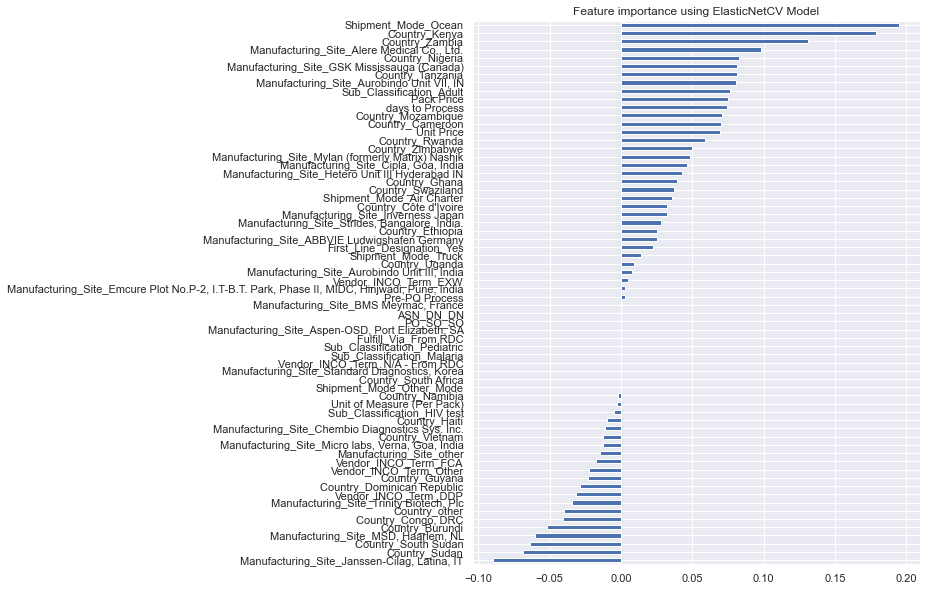

In [1481]:
#Visualization

imp_Coef_elastic = Coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_Coef_elastic.plot(kind = "barh")

plt.title("Feature importance using ElasticNetCV Model")

In [1482]:
features_by_ECV = imp_Coef_elastic

In [1483]:
# predictions on the data
y_pred_train_ECV = ECV.predict(X_train_sc)  
y_pred_test_ECV = ECV.predict(X_test_sc)  

In [1484]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_ECV))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ECV))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_ECV))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_ECV))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ECV))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_ECV))

R2 score of train data is  0.24730458871736571
Adj. R2 score of train data is  0.2392465356525394
rmse score of train data is  0.1533502697300492

R2 score of test data is  0.25672756131000907
Adj. R2 score of train data is  0.23789609069444695
rmse score of test data is  0.15367197926750217


In [1485]:
results.loc[len(results)] = ['Linear Regression_ElasticNetCV',
                             r2_score(y_train_sc,y_pred_train_ECV),
                             adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ECV),
                             rmse(y_train_sc,y_pred_train_ECV),
                             r2_score(y_test_sc,y_pred_test_ECV),
                             adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ECV),
                             rmse(y_test_sc,y_pred_test_ECV)]

results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0            Linear Regression_BE        0.244884            0.240618   
1           Linear Regression_RFE        0.166176            0.165104   
2         Linear Regression_Lasso        0.247339            0.239282   
3  Linear Regression_ElasticNetCV        0.247305            0.239247   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0          0.153597       0.253373           0.243460         0.154018  
1          0.161403       0.163898           0.161386         0.162986  
2          0.153347       0.256745           0.237914         0.153670  
3          0.153350       0.256728           0.237896         0.153672

### Residual Analysis

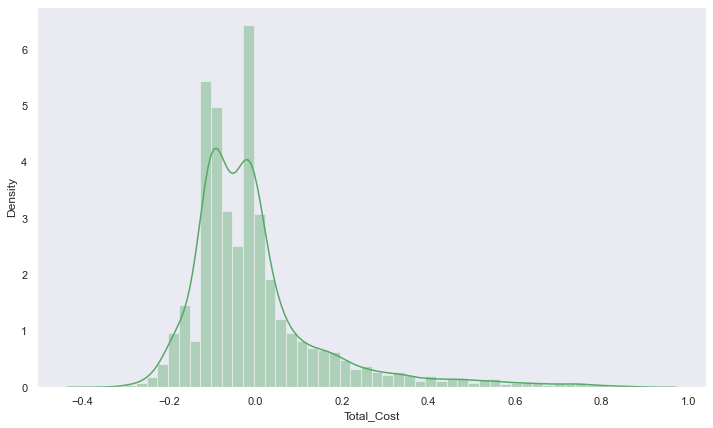

In [1486]:
# check how error terms are distributed on train data
y_res = y_train_sc - y_pred_train_rfe
plt.figure(figsize=(12,7))
sns.distplot(y_res, kde = True, color = 'g')
plt.grid()
plt.show()

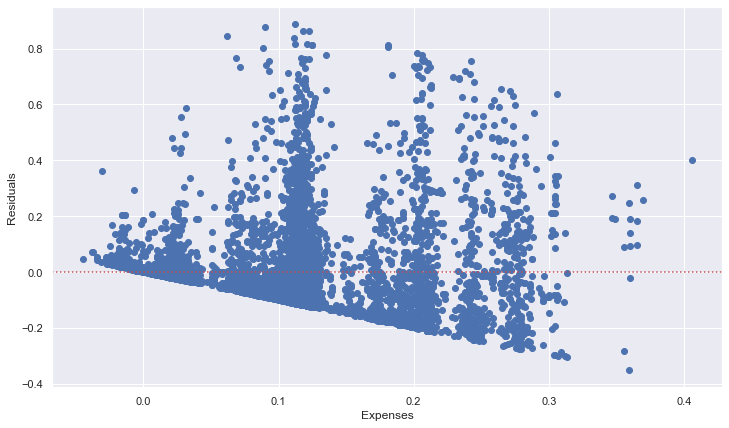

In [1487]:
# residual vs predicitons plot

plt.figure(figsize=(12,7))
plt.scatter(y_pred_train_rfe, y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Expenses")
plt.ylabel("Residuals")
plt.show()

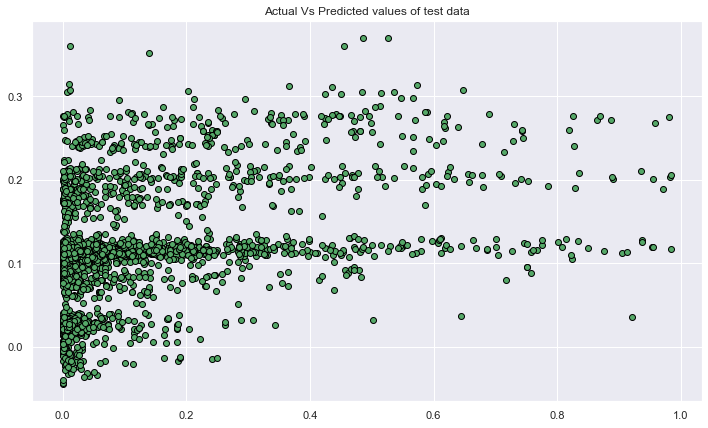

In [1488]:
#actual test values vs predicted test values

plt.figure(figsize=(12,7))
plt.title('Actual Vs Predicted values of test data')
plt.scatter(y_test_sc, y_pred_test_rfe, color='g', edgecolor = 'Black')
plt.show()